In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import random
import scipy.stats as st
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science with Python/Project/Bank Marketing Campaigns/bank-direct-marketing-campaigns.csv")

In [4]:
df_copy = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science with Python/Project/Bank Marketing Campaigns/bank-direct-marketing-campaigns.csv")
df_copy.rename(columns = {'y':'Result'},inplace=True)
df_copy['Result'].replace({'yes':1,'no':0},inplace=True)
df_copy

,Age,Job,Marital Status,Education,Default,Housing Loan,Personal Loan,Contact,Month,Day_of_week,Campaign,Pdays,Previous,Poutcome,Emp_Var_Rate,Cons_Price_Idx,Cons_conf_idx,euribor3m,nr.employed,Result
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [5]:
df

,Age,Job,Marital Status,Education,Default,Housing Loan,Personal Loan,Contact,Month,Day_of_week,Campaign,Pdays,Previous,Poutcome,Emp_Var_Rate,Cons_Price_Idx,Cons_conf_idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             41188 non-null  int64  
 1   Job             41188 non-null  object 
 2   Marital Status  41188 non-null  object 
 3   Education       41188 non-null  object 
 4   Default         41188 non-null  object 
 5   Housing Loan    41188 non-null  object 
 6   Personal Loan   41188 non-null  object 
 7   Contact         41188 non-null  object 
 8   Month           41188 non-null  object 
 9   Day_of_week     41188 non-null  object 
 10  Campaign        41188 non-null  int64  
 11  Pdays           41188 non-null  int64  
 12  Previous        41188 non-null  int64  
 13  Poutcome        41188 non-null  object 
 14  Emp_Var_Rate    41188 non-null  float64
 15  Cons_Price_Idx  41188 non-null  float64
 16  Cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [7]:
# renaming the target variable to 'Result'
df.rename(columns = {'y':'Result'},inplace=True)

In [8]:
# recoding the target variable to binary
df['Result'].replace({'yes':1,'no':0},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             41188 non-null  int64  
 1   Job             41188 non-null  object 
 2   Marital Status  41188 non-null  object 
 3   Education       41188 non-null  object 
 4   Default         41188 non-null  object 
 5   Housing Loan    41188 non-null  object 
 6   Personal Loan   41188 non-null  object 
 7   Contact         41188 non-null  object 
 8   Month           41188 non-null  object 
 9   Day_of_week     41188 non-null  object 
 10  Campaign        41188 non-null  int64  
 11  Pdays           41188 non-null  int64  
 12  Previous        41188 non-null  int64  
 13  Poutcome        41188 non-null  object 
 14  Emp_Var_Rate    41188 non-null  float64
 15  Cons_Price_Idx  41188 non-null  float64
 16  Cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

**Observation:**

Out of 20 columns, 10 are categorical and the other 10 a continuous variables

# Data Exploration & Transformation

In [10]:
df.describe()

,Age,Campaign,Pdays,Previous,Emp_Var_Rate,Cons_Price_Idx,Cons_conf_idx,euribor3m,nr.employed,Result
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
df.describe(include='object')

,Job,Marital Status,Education,Default,Housing Loan,Personal Loan,Contact,Month,Day_of_week,Poutcome
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563


**Observation:**

1.   Most of the customers are having an admin related job.
2.   Most of the customers are married.
3.   Most of the customers are having a degree.
4.   Most of the customers have no credit default in the past.



array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Campaign'}>,
        <Axes: title={'center': 'Pdays'}>],
       [<Axes: title={'center': 'Previous'}>,
        <Axes: title={'center': 'Emp_Var_Rate'}>,
        <Axes: title={'center': 'Cons_Price_Idx'}>],
       [<Axes: title={'center': 'Cons_conf_idx'}>,
        <Axes: title={'center': 'euribor3m'}>,
        <Axes: title={'center': 'nr.employed'}>],
       [<Axes: title={'center': 'Result'}>, <Axes: >, <Axes: >]],
      dtype=object)

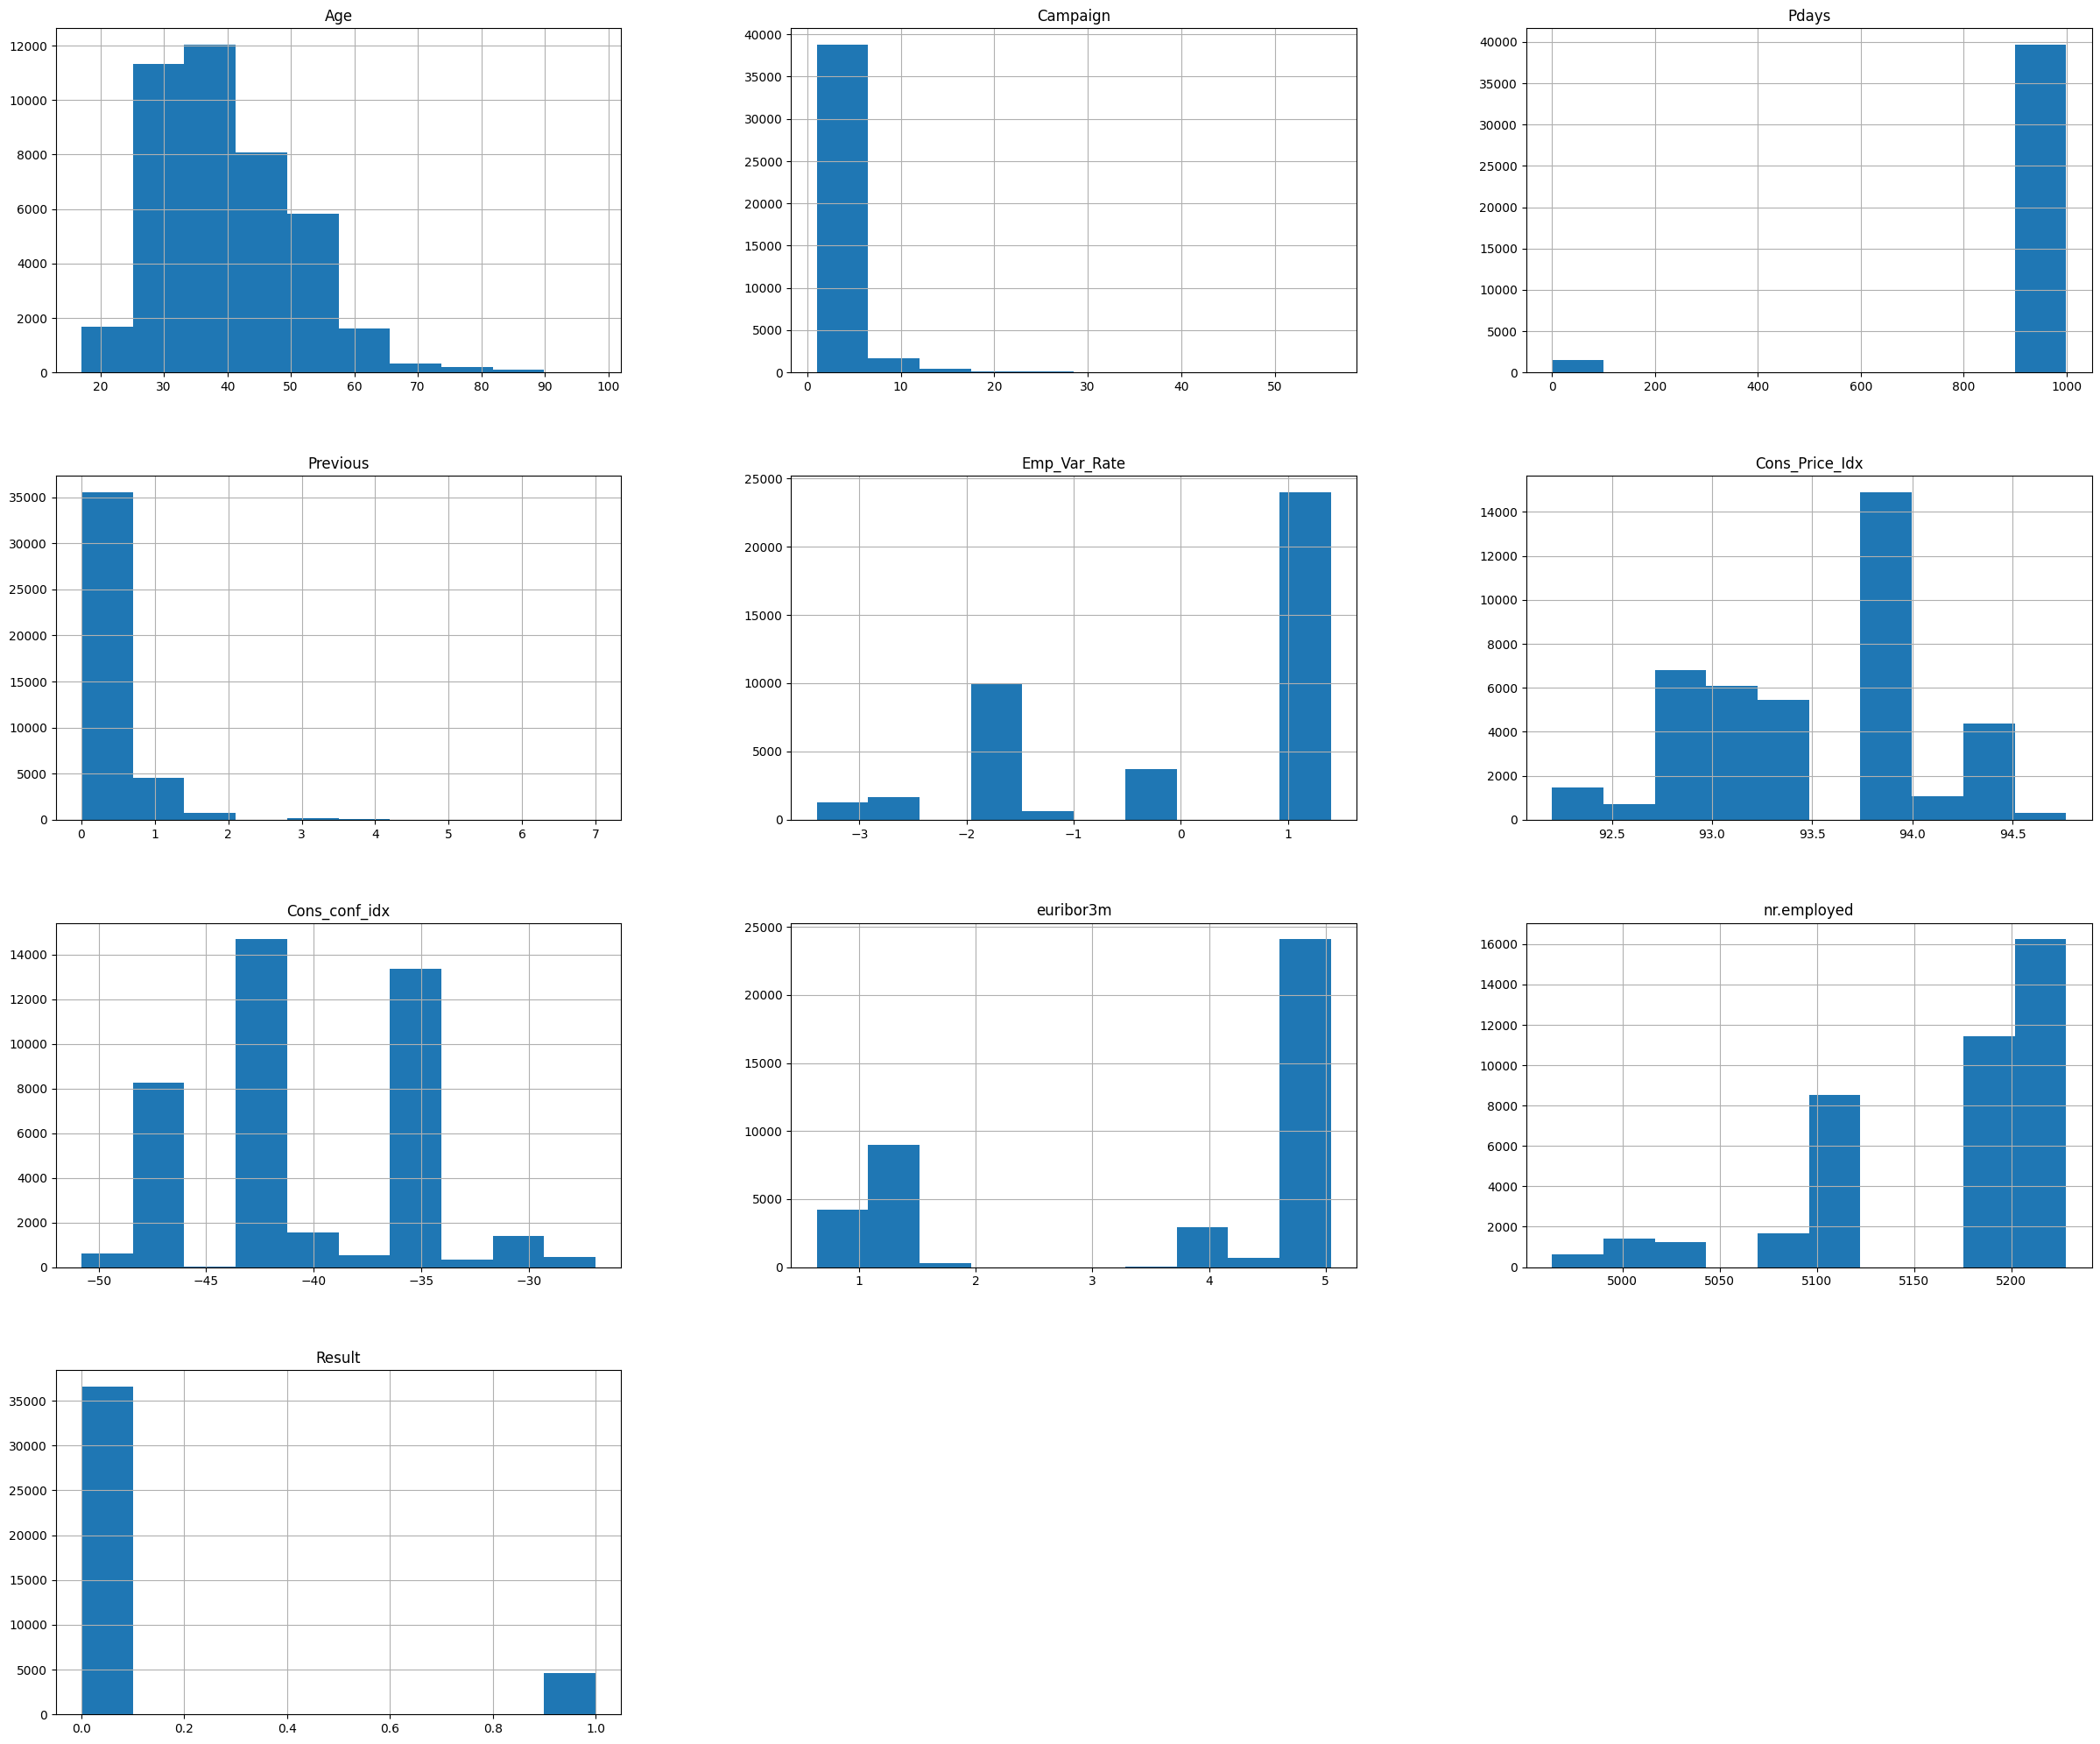

In [12]:
df.hist(figsize=(30,25))

In [13]:
# getting frequency of each unique value in the target variable
df['Result'].value_counts()

0    36548
1     4640
Name: Result, dtype: int64

<Axes: title={'center': 'Distribution of Target Variable'}, ylabel='Result'>

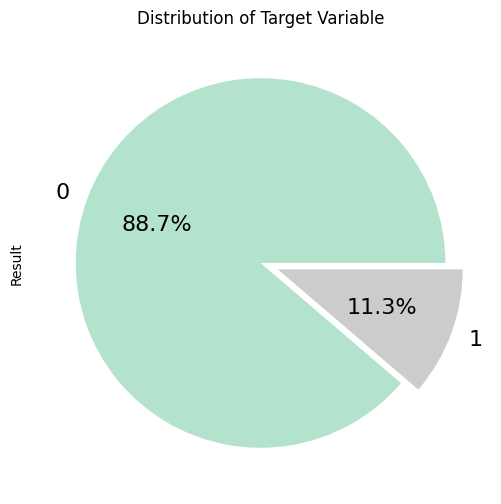

In [14]:
fig = plt.figure(figsize = (11,6))
plt.title("Distribution of Target Variable")
df["Result"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", cmap = 'Pastel2',
                                   textprops={'fontsize': 16}, explode = (0,0.1))

## Missing Values

In [15]:
# checking for missing values
df.isnull().sum()
# Dataset has no empty cells from the below data

Age               0
Job               0
Marital Status    0
Education         0
Default           0
Housing Loan      0
Personal Loan     0
Contact           0
Month             0
Day_of_week       0
Campaign          0
Pdays             0
Previous          0
Poutcome          0
Emp_Var_Rate      0
Cons_Price_Idx    0
Cons_conf_idx     0
euribor3m         0
nr.employed       0
Result            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             41188 non-null  int64  
 1   Job             41188 non-null  object 
 2   Marital Status  41188 non-null  object 
 3   Education       41188 non-null  object 
 4   Default         41188 non-null  object 
 5   Housing Loan    41188 non-null  object 
 6   Personal Loan   41188 non-null  object 
 7   Contact         41188 non-null  object 
 8   Month           41188 non-null  object 
 9   Day_of_week     41188 non-null  object 
 10  Campaign        41188 non-null  int64  
 11  Pdays           41188 non-null  int64  
 12  Previous        41188 non-null  int64  
 13  Poutcome        41188 non-null  object 
 14  Emp_Var_Rate    41188 non-null  float64
 15  Cons_Price_Idx  41188 non-null  float64
 16  Cons_conf_idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

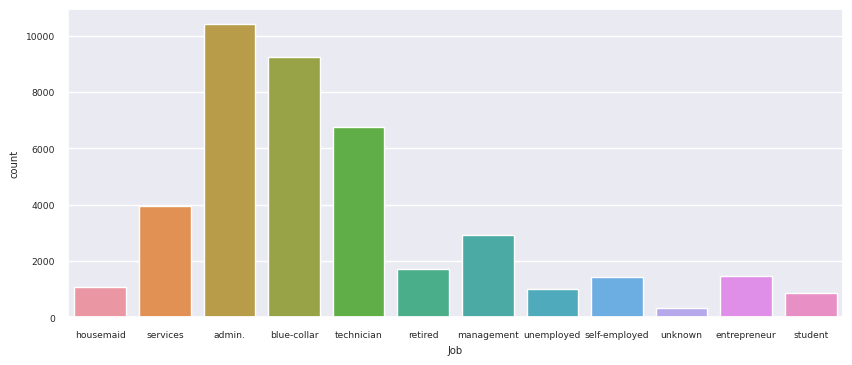

In [17]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Job',data=df)
plt.show()

In [18]:
df['Job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: Job, dtype: int64

In [19]:
# There is a value named "unknown" which can be considered as potential missing values. so rows with value 'unknown' are being dropped.
df = df.drop(df[df['Job']=='unknown'].index)

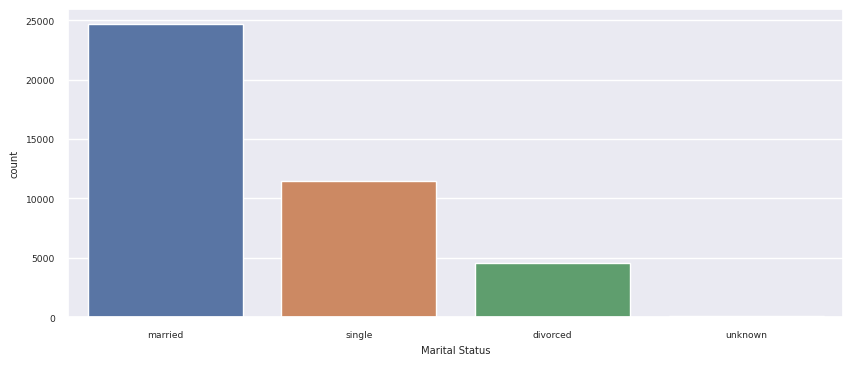

In [20]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Marital Status',data=df)
plt.show()

In [21]:
df_copy['Marital Status'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: Marital Status, dtype: int64

In [22]:
# There is a value named "unknown" which can be considered as potential missing values. so rows with value 'unknown' are being dropped.
df = df.drop(df[df['Marital Status']=='unknown'].index)

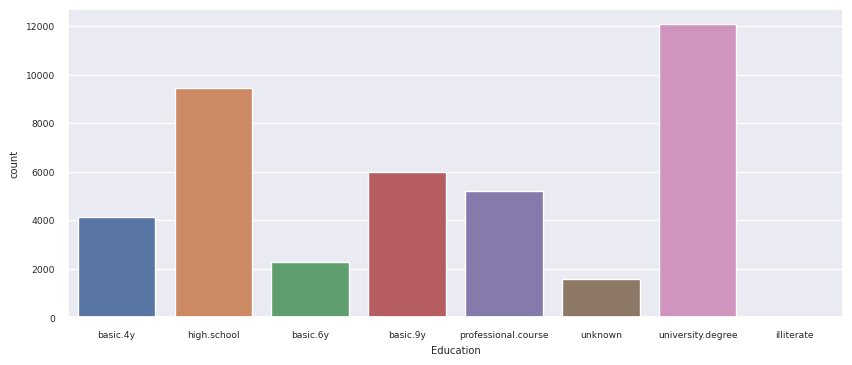

In [23]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Education',data=df)
plt.show()

In [24]:
df['Education'].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: Education, dtype: int64

In [25]:
# There is a value named "unknown" which can be considered as potential missing values. so rows with value 'unknown' are being dropped.
df = df.drop(df[df['Education']=='unknown'].index)

In [26]:
# column education has a value 'illiterate with only 18 rows which is only 0.05% in the data set. so dropping the rows with 'illiterate'
df = df.drop(df[df['Education']=='illiterate'].index)

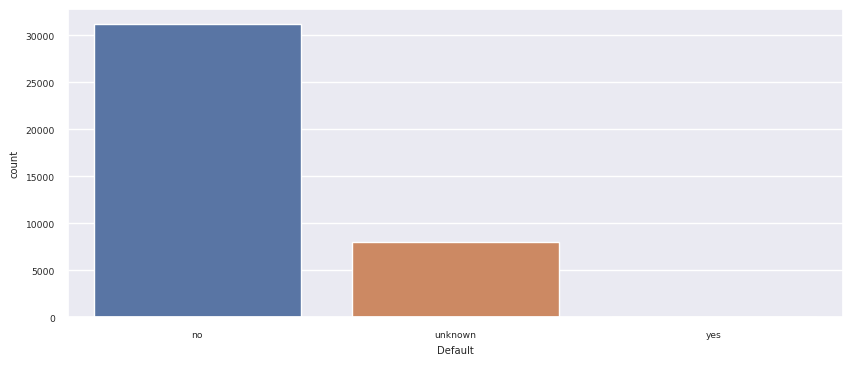

In [27]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Default',data=df)
plt.show()

In [28]:
df['Default'].value_counts()

no         31213
unknown     7957
yes            3
Name: Default, dtype: int64

In [29]:
# column default has 7957 rows with value 'unknown' and 3 rows with value 'yes'.
# if we remove the rows with 'unknown', practically there will be only one constant significant value 'no'. so better to drop the column.
df.drop('Default',axis=1,inplace=True)

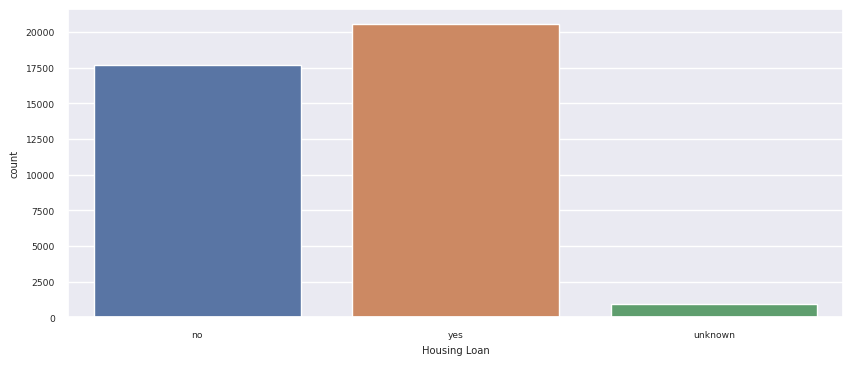

In [30]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Housing Loan',data=df)
plt.show()

In [31]:
df['Housing Loan'].value_counts()

yes        20568
no         17659
unknown      946
Name: Housing Loan, dtype: int64

In [32]:
# There is a value named "unknown" which can be considered as potential missing values. so rows with value 'unknown' are being dropped.
df = df.drop(df[df['Housing Loan']=='unknown'].index)

In [33]:
df.shape

(38227, 19)

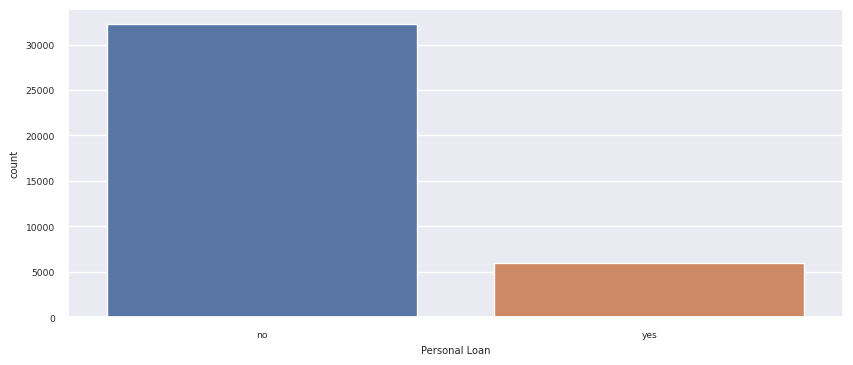

In [34]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Personal Loan',data=df)
plt.show()

In [35]:
df['Personal Loan'].value_counts()

no     32271
yes     5956
Name: Personal Loan, dtype: int64

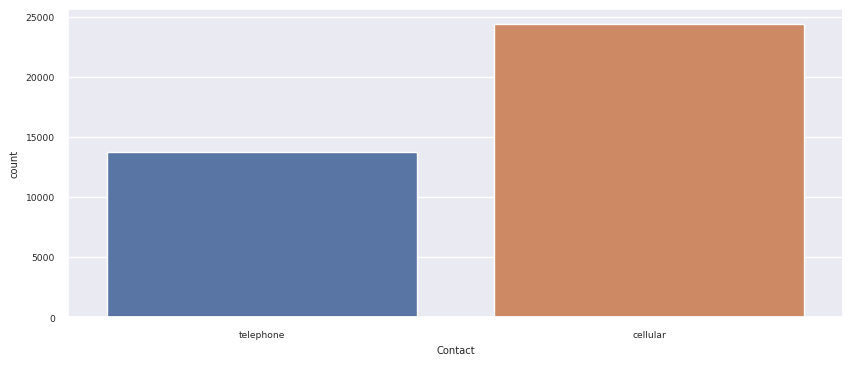

In [36]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Contact',data=df)
plt.show()

In [37]:
df['Contact'].value_counts()

cellular     24426
telephone    13801
Name: Contact, dtype: int64

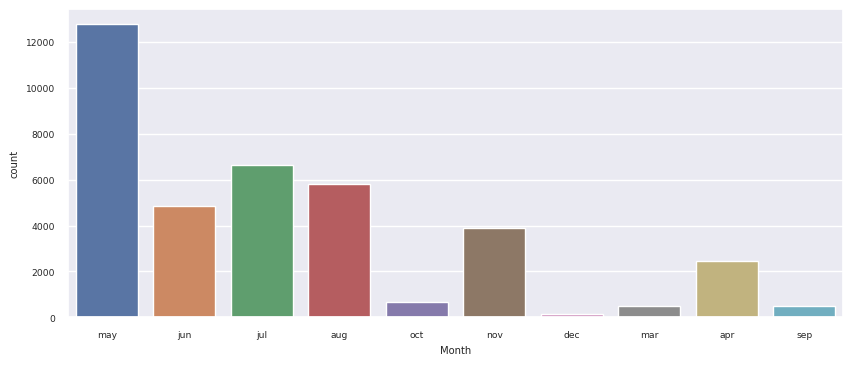

In [38]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Month',data=df)
plt.show()

In [39]:
df['Month'].value_counts()

may    12791
jul     6625
aug     5817
jun     4846
nov     3895
apr     2434
oct      659
sep      502
mar      497
dec      161
Name: Month, dtype: int64

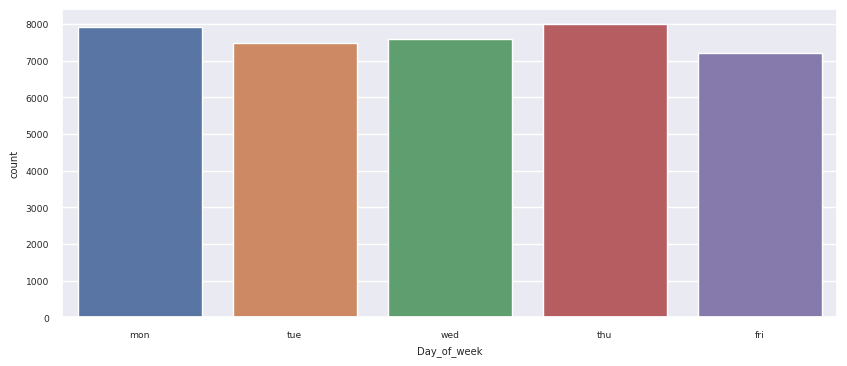

In [40]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Day_of_week',data=df)
plt.show()

In [41]:
df['Day_of_week'].value_counts()

thu    8005
mon    7926
wed    7600
tue    7476
fri    7220
Name: Day_of_week, dtype: int64

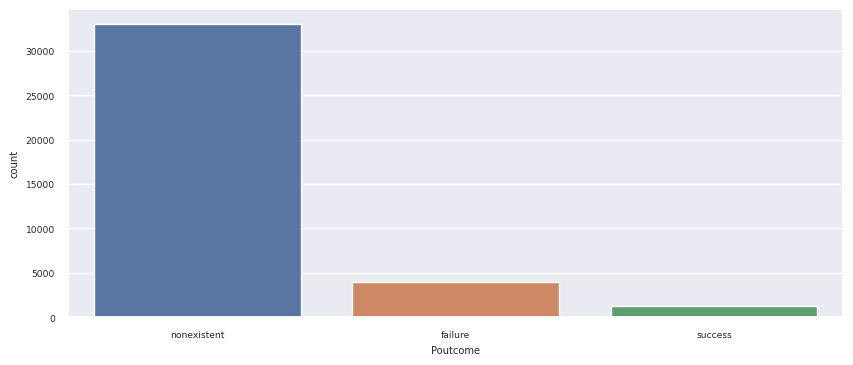

In [42]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Poutcome',data=df)
plt.show()

In [43]:
df['Poutcome'].value_counts()

nonexistent    33050
failure         3935
success         1242
Name: Poutcome, dtype: int64

In [44]:
df.nunique()

Age                77
Job                11
Marital Status      3
Education           6
Housing Loan        2
Personal Loan       2
Contact             2
Month              10
Day_of_week         5
Campaign           41
Pdays              26
Previous            8
Poutcome            3
Emp_Var_Rate       10
Cons_Price_Idx     26
Cons_conf_idx      26
euribor3m         314
nr.employed        11
Result              2
dtype: int64

## Column Transformation

In [45]:
df['Age']

0        56
1        57
2        37
3        40
4        56
         ..
41183    73
41184    46
41185    56
41186    44
41187    74
Name: Age, Length: 38227, dtype: int64

In [46]:
df['Age'].value_counts()

31    1858
32    1757
33    1742
36    1678
35    1654
      ... 
98       2
89       2
95       1
87       1
94       1
Name: Age, Length: 77, dtype: int64

In [47]:
# Recoding the Age column from continuous to categorical
# define the age bins
bins = [0, 20, 30, 40, 50, 60, 70, 80, 100]
# define the bin labels
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-100']
# bin the Age column and create a new column 'Age Binned'
df['Age Binned'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

In [48]:
df[['Age','Age Binned']]

,Age,Age Binned
0,56,50-60
1,57,50-60
2,37,30-40
3,40,30-40
4,56,50-60
...,...,...
41183,73,70-80
41184,46,40-50
41185,56,50-60
41186,44,40-50


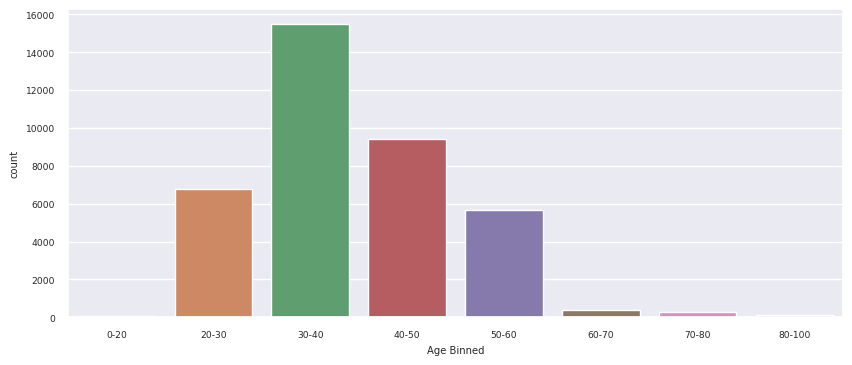

In [49]:
sns.set(font_scale=0.6)  # set font size
plt.figure(figsize=(10, 4)) # set figure size
sns.countplot(x='Age Binned',data=df)
plt.show()

In [50]:
df['Age Binned'].value_counts()

30-40     15500
40-50      9393
20-30      6792
50-60      5674
60-70       409
70-80       264
80-100      104
0-20         91
Name: Age Binned, dtype: int64

In [51]:
df['Age Binned'].nunique()

8

In [52]:
df['Age Binned'].info()

<class 'pandas.core.series.Series'>
Int64Index: 38227 entries, 0 to 41187
Series name: Age Binned
Non-Null Count  Dtype   
--------------  -----   
38227 non-null  category
dtypes: category(1)
memory usage: 336.3 KB


In [53]:
df['Age Binned']=df['Age Binned'].astype('object')

In [54]:
#Now dropping the original 'Age' coulmn
df.drop('Age',axis=1,inplace=True)

In [55]:
df['Pdays'].value_counts()

999    36862
3        393
6        378
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
22         3
19         3
21         2
25         1
26         1
27         1
Name: Pdays, dtype: int64

In [56]:
# the column pdays value '999' value in '37k' rows which is insignificant.
# considering the value '999' is place as a default value of unknown or 0, dropping the column 'Pdays'
df.drop('Pdays',axis=1,inplace = True)

In [57]:
df.shape

(38227, 18)

In [58]:
df.columns

Index(['Job', 'Marital Status', 'Education', 'Housing Loan', 'Personal Loan',
       'Contact', 'Month', 'Day_of_week', 'Campaign', 'Previous', 'Poutcome',
       'Emp_Var_Rate', 'Cons_Price_Idx', 'Cons_conf_idx', 'euribor3m',
       'nr.employed', 'Result', 'Age Binned'],
      dtype='object')

In [59]:
new_order = ['Age Binned', 'Job', 'Marital Status', 'Education', 'Housing Loan', 'Personal Loan',
       'Contact', 'Month', 'Day_of_week', 'Campaign', 'Previous', 'Poutcome',
       'Emp_Var_Rate', 'Cons_Price_Idx', 'Cons_conf_idx', 'euribor3m',
       'nr.employed', 'Result']
df = df.reindex(columns=new_order)
df

,Age Binned,Job,Marital Status,Education,Housing Loan,Personal Loan,Contact,Month,Day_of_week,Campaign,Previous,Poutcome,Emp_Var_Rate,Cons_Price_Idx,Cons_conf_idx,euribor3m,nr.employed,Result
0,50-60,housemaid,married,basic.4y,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,50-60,services,married,high.school,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,30-40,services,married,high.school,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,30-40,admin.,married,basic.6y,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,50-60,services,married,high.school,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,70-80,retired,married,professional.course,yes,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,40-50,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,50-60,retired,married,university.degree,yes,no,cellular,nov,fri,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,40-50,technician,married,professional.course,no,no,cellular,nov,fri,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38227 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age Binned      38227 non-null  object 
 1   Job             38227 non-null  object 
 2   Marital Status  38227 non-null  object 
 3   Education       38227 non-null  object 
 4   Housing Loan    38227 non-null  object 
 5   Personal Loan   38227 non-null  object 
 6   Contact         38227 non-null  object 
 7   Month           38227 non-null  object 
 8   Day_of_week     38227 non-null  object 
 9   Campaign        38227 non-null  int64  
 10  Previous        38227 non-null  int64  
 11  Poutcome        38227 non-null  object 
 12  Emp_Var_Rate    38227 non-null  float64
 13  Cons_Price_Idx  38227 non-null  float64
 14  Cons_conf_idx   38227 non-null  float64
 15  euribor3m       38227 non-null  float64
 16  nr.employed     38227 non-null  float64
 17  Result          38227 non-null 

## Outlier Analysis

In [61]:
df1=df[['Campaign', 'Previous', 'Emp_Var_Rate', 'Cons_Price_Idx',
       'Cons_conf_idx', 'euribor3m', 'nr.employed']]

In [62]:
# Using interquantile range method to identify the outliers
for col in df1:
  Q1 = df[col].quantile(0.10)
  Q3 = df[col].quantile(0.90)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3 * IQR
  upper_bound = Q3 + 3 * IQR
  outliers = df[col][(df1[col] < lower_bound) | (df[col] > upper_bound)]
  print(col, end='\t\t\t')
  print(outliers.count())

Campaign			232
Previous			21
Emp_Var_Rate			0
Cons_Price_Idx			0
Cons_conf_idx			0
euribor3m			0
nr.employed			0


In [63]:
# As there are only 232 outliers in column 'Campaign' and 21 in 'Previous' column. So removing the outliers from the dataset.

In [64]:
  Q1 = df['Campaign'].quantile(0.10)
  Q3 = df['Campaign'].quantile(0.90)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3 * IQR
  upper_bound = Q3 + 3 * IQR
  outliers = df['Campaign'][(df1['Campaign'] < lower_bound) | (df['Campaign'] > upper_bound)]

In [65]:
df = df.drop(df[(df['Campaign'] < lower_bound) | (df1['Campaign'] > upper_bound)].index)

In [66]:
  Q1 = df['Previous'].quantile(0.10)
  Q3 = df['Previous'].quantile(0.90)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3 * IQR
  upper_bound = Q3 + 3 * IQR
  outliers = df['Previous'][(df1['Previous'] < lower_bound) | (df['Previous'] > upper_bound)]

In [67]:
df = df.drop(df[(df['Previous'] < lower_bound) | (df1['Previous'] > upper_bound)].index)

<ipython-input-67-90e8e7fc1d15>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df.drop(df[(df['Previous'] < lower_bound) | (df1['Previous'] > upper_bound)].index)


In [68]:
# Rechecking for outliers
for col in df1:
  Q1 = df[col].quantile(0.10)
  Q3 = df[col].quantile(0.90)
  IQR = Q3 - Q1
  lower_bound = Q1 - 3 * IQR
  upper_bound = Q3 + 3 * IQR
  outliers = df[col][(df1[col] < lower_bound) | (df[col] > upper_bound)]
  print(col, end='\t\t\t')
  print(outliers.count())

Campaign			0
Previous			0
Emp_Var_Rate			0
Cons_Price_Idx			0
Cons_conf_idx			0
euribor3m			0
nr.employed			0


In [69]:
# There are no outliers in the dataset and no missing values as well

# Data Visualisation

In [70]:
# Visualising the data for any interesting insights

In [71]:
df.shape
# The final dataset has 37968 rows and 18 columns

(37974, 18)

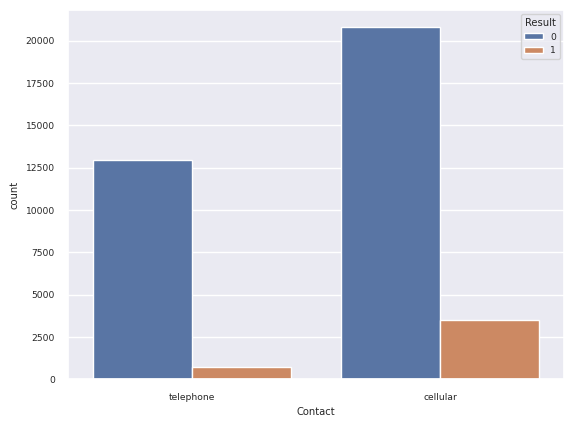

In [72]:
sns.countplot(x='Contact', hue='Result',data=df)
plt.show()

In [73]:
pd.crosstab(index=df['Contact'], columns=df['Result'],margins=True)
#The Probability of customers enrolling to term deposit is ~3 times higher when contacted via cellular than when contacted via telephone.

Result,0,1,All
Contact,,,
cellular,20791,3519,24310
telephone,12943,721,13664
All,33734,4240,37974


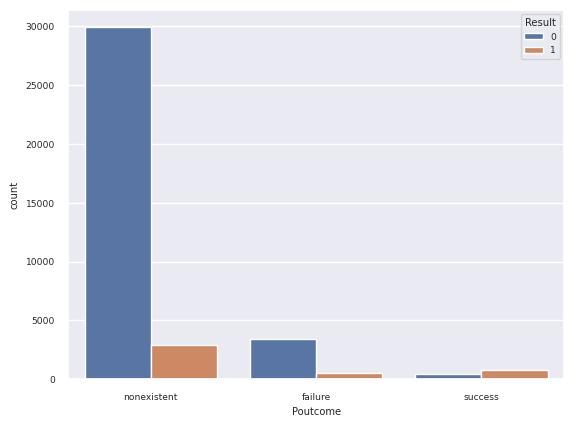

In [74]:
sns.countplot(x='Poutcome', hue='Result',data=df)
plt.show()

In [75]:
pd.crosstab(index=df['Poutcome'], columns=df['Result'],margins=True)
#The Probability of customers enrolling to term deposit is ~3 times higher when contacted via cellular than when contacted via telephone.

Result,0,1,All
Poutcome,,,
failure,3399,532,3931
nonexistent,29900,2918,32818
success,435,790,1225
All,33734,4240,37974


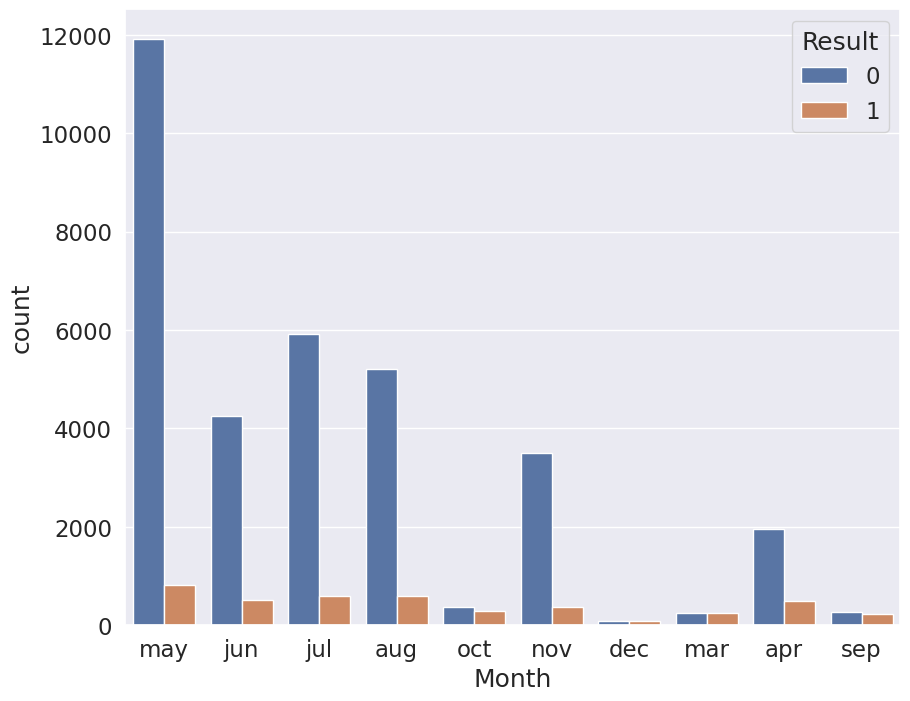

In [76]:
sns.set(font_scale=1.5)  # set font size
plt.figure(figsize=(10, 8)) # set figure size
sns.countplot(x='Month', hue='Result',data=df)
plt.show()

In [77]:
pd.crosstab(index=df['Month'], columns=df['Result'],margins=True)
#There is ~50% probability that customers enrolls to the term deposit when contacted in months March, September, October, and December.

Result,0,1,All
Month,,,
apr,1948,485,2433
aug,5206,592,5798
dec,84,77,161
jul,5924,599,6523
jun,4256,510,4766
mar,243,252,495
may,11927,826,12753
nov,3509,380,3889
oct,362,296,658


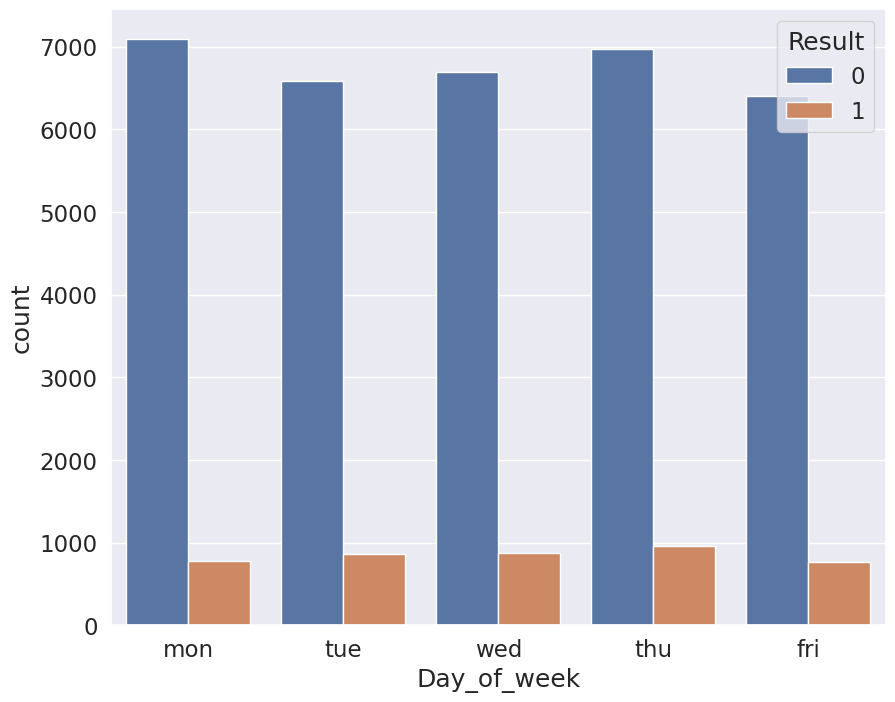

In [78]:
sns.set(font_scale=1.5)  # set font size
plt.figure(figsize=(10, 8)) # set figure size
sns.countplot(x='Day_of_week', hue='Result',data=df)
plt.show()

In [79]:
pd.crosstab(index=df['Day_of_week'], columns=df['Result'],margins=True)

Result,0,1,All
Day_of_week,,,
fri,6397,771,7168
mon,7096,783,7879
thu,6968,955,7923
tue,6580,862,7442
wed,6693,869,7562
All,33734,4240,37974


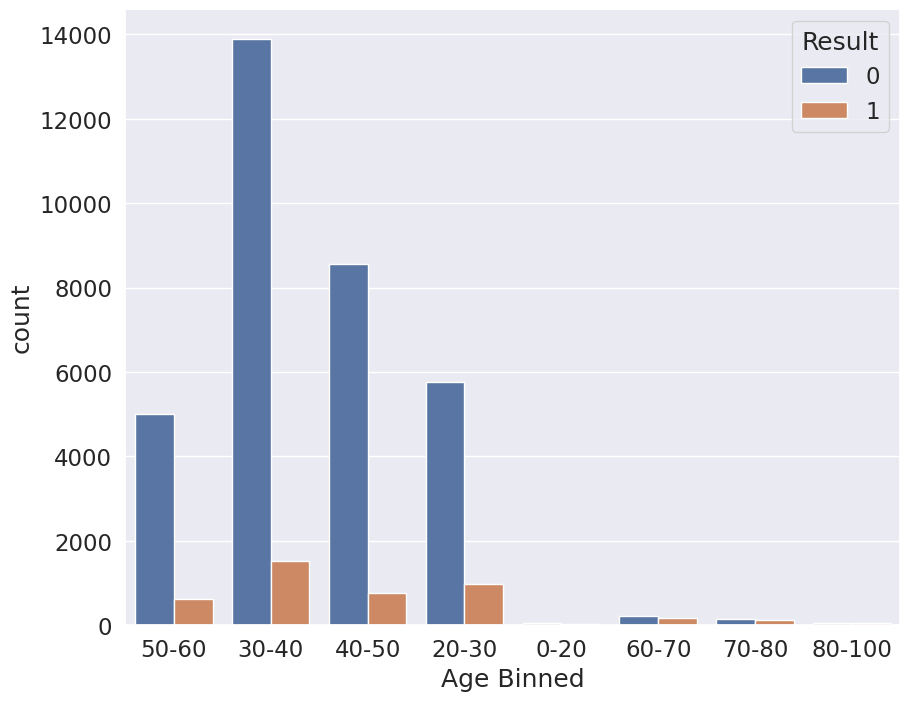

In [80]:
sns.set(font_scale=1.5)  # set font size
plt.figure(figsize=(10, 8)) # set figure size
#age_order = ['[0-20]','[20-30]', '[30-40]', '[40-50]', '[50-60]', '[60-70]', '[70-80]', '[80-100]']
sns.countplot(x='Age Binned', hue='Result',data=df)
plt.show()

In [81]:
pd.crosstab(index=df['Age Binned'], columns=df['Result'],margins=True)

Result,0,1,All
Age Binned,,,
0-20,59,32,91
20-30,5765,978,6743
30-40,13903,1514,15417
40-50,8571,759,9330
50-60,5009,611,5620
60-70,226,179,405
70-80,145,119,264
80-100,56,48,104
All,33734,4240,37974


**Observations:**


1.   Customers who are contacted through telephone are more likely to enroll for term deposit.

2.   Customers who are enrolled during the previous campaign are more likely to enroll again for the term deposit.

3.   Customers when contacted in the months March, September, October, and December have ~50% probability to enroll for the term deposit.

4.   Customers with age above 50 are more likely to enroll for the term deposit.



In [82]:
df.corr()

<ipython-input-82-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Campaign,Previous,Emp_Var_Rate,Cons_Price_Idx,Cons_conf_idx,euribor3m,nr.employed,Result
Campaign,1.000000,-0.080151,0.145667,0.112002,-0.004983,0.128155,0.138275,-0.062473
Previous,-0.080151,1.000000,-0.427021,-0.221911,-0.056169,-0.455585,-0.495479,0.218752
Emp_Var_Rate,0.145667,-0.427021,1.000000,0.776127,0.213324,0.972416,0.908212,-0.290804
Cons_Price_Idx,0.112002,-0.221911,0.776127,1.000000,0.072849,0.690668,0.525654,-0.132785
Cons_conf_idx,-0.004983,-0.056169,0.213324,0.072849,1.000000,0.294089,0.116445,0.051690
euribor3m,0.128155,-0.455585,0.972416,0.690668,0.294089,1.000000,0.945390,-0.298811
nr.employed,0.138275,-0.495479,0.908212,0.525654,0.116445,0.945390,1.000000,-0.345842
Result,-0.062473,0.218752,-0.290804,-0.132785,0.051690,-0.298811,-0.345842,1.000000


<ipython-input-172-f57f5e670e67>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

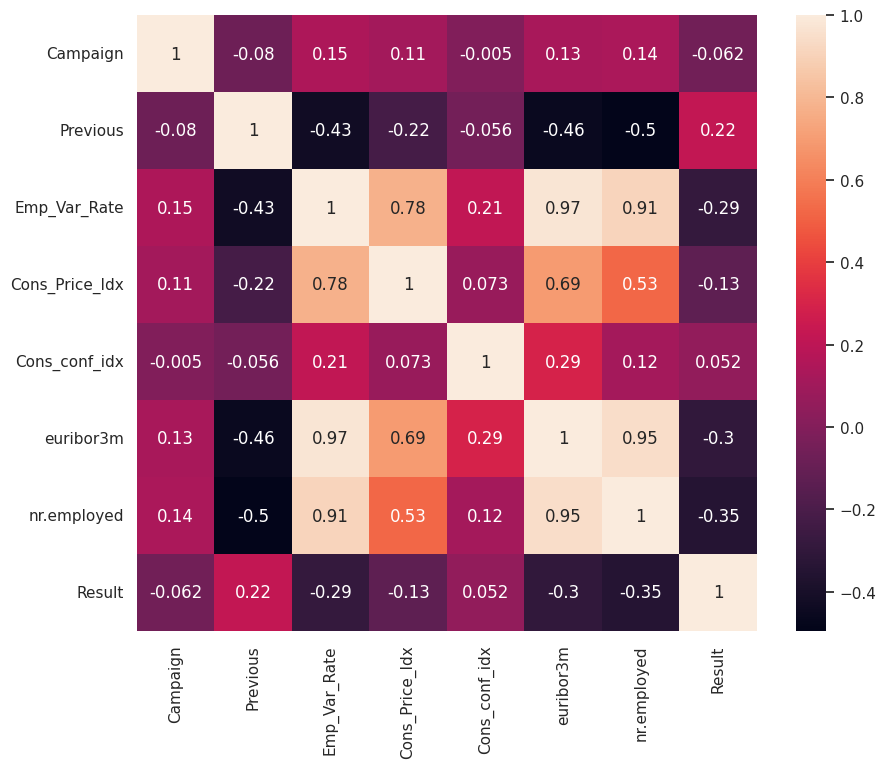

In [172]:
# Heatmap with the correlation matrix
sns.set(font_scale=1.0)  # set font size
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

<ipython-input-84-6acad5f6e415>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Result'].plot(kind='bar',color='purple')


<Axes: >

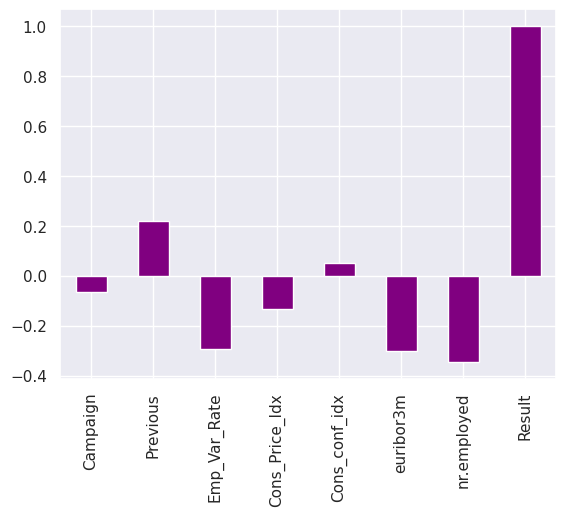

In [84]:
df.corr()['Result'].plot(kind='bar',color='purple')

<Axes: xlabel='Emp_Var_Rate', ylabel='euribor3m'>

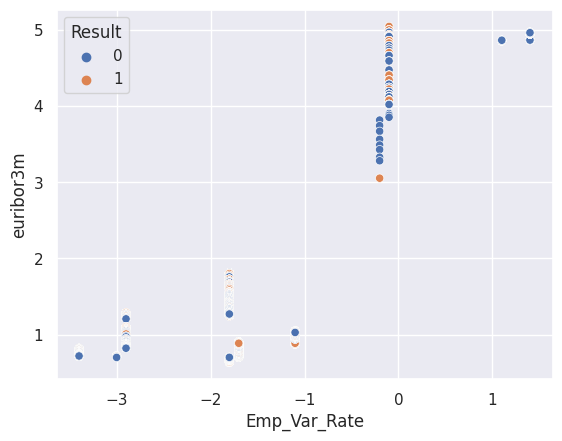

In [85]:
sns.scatterplot(data=df, x='Emp_Var_Rate', y='euribor3m', hue = 'Result')

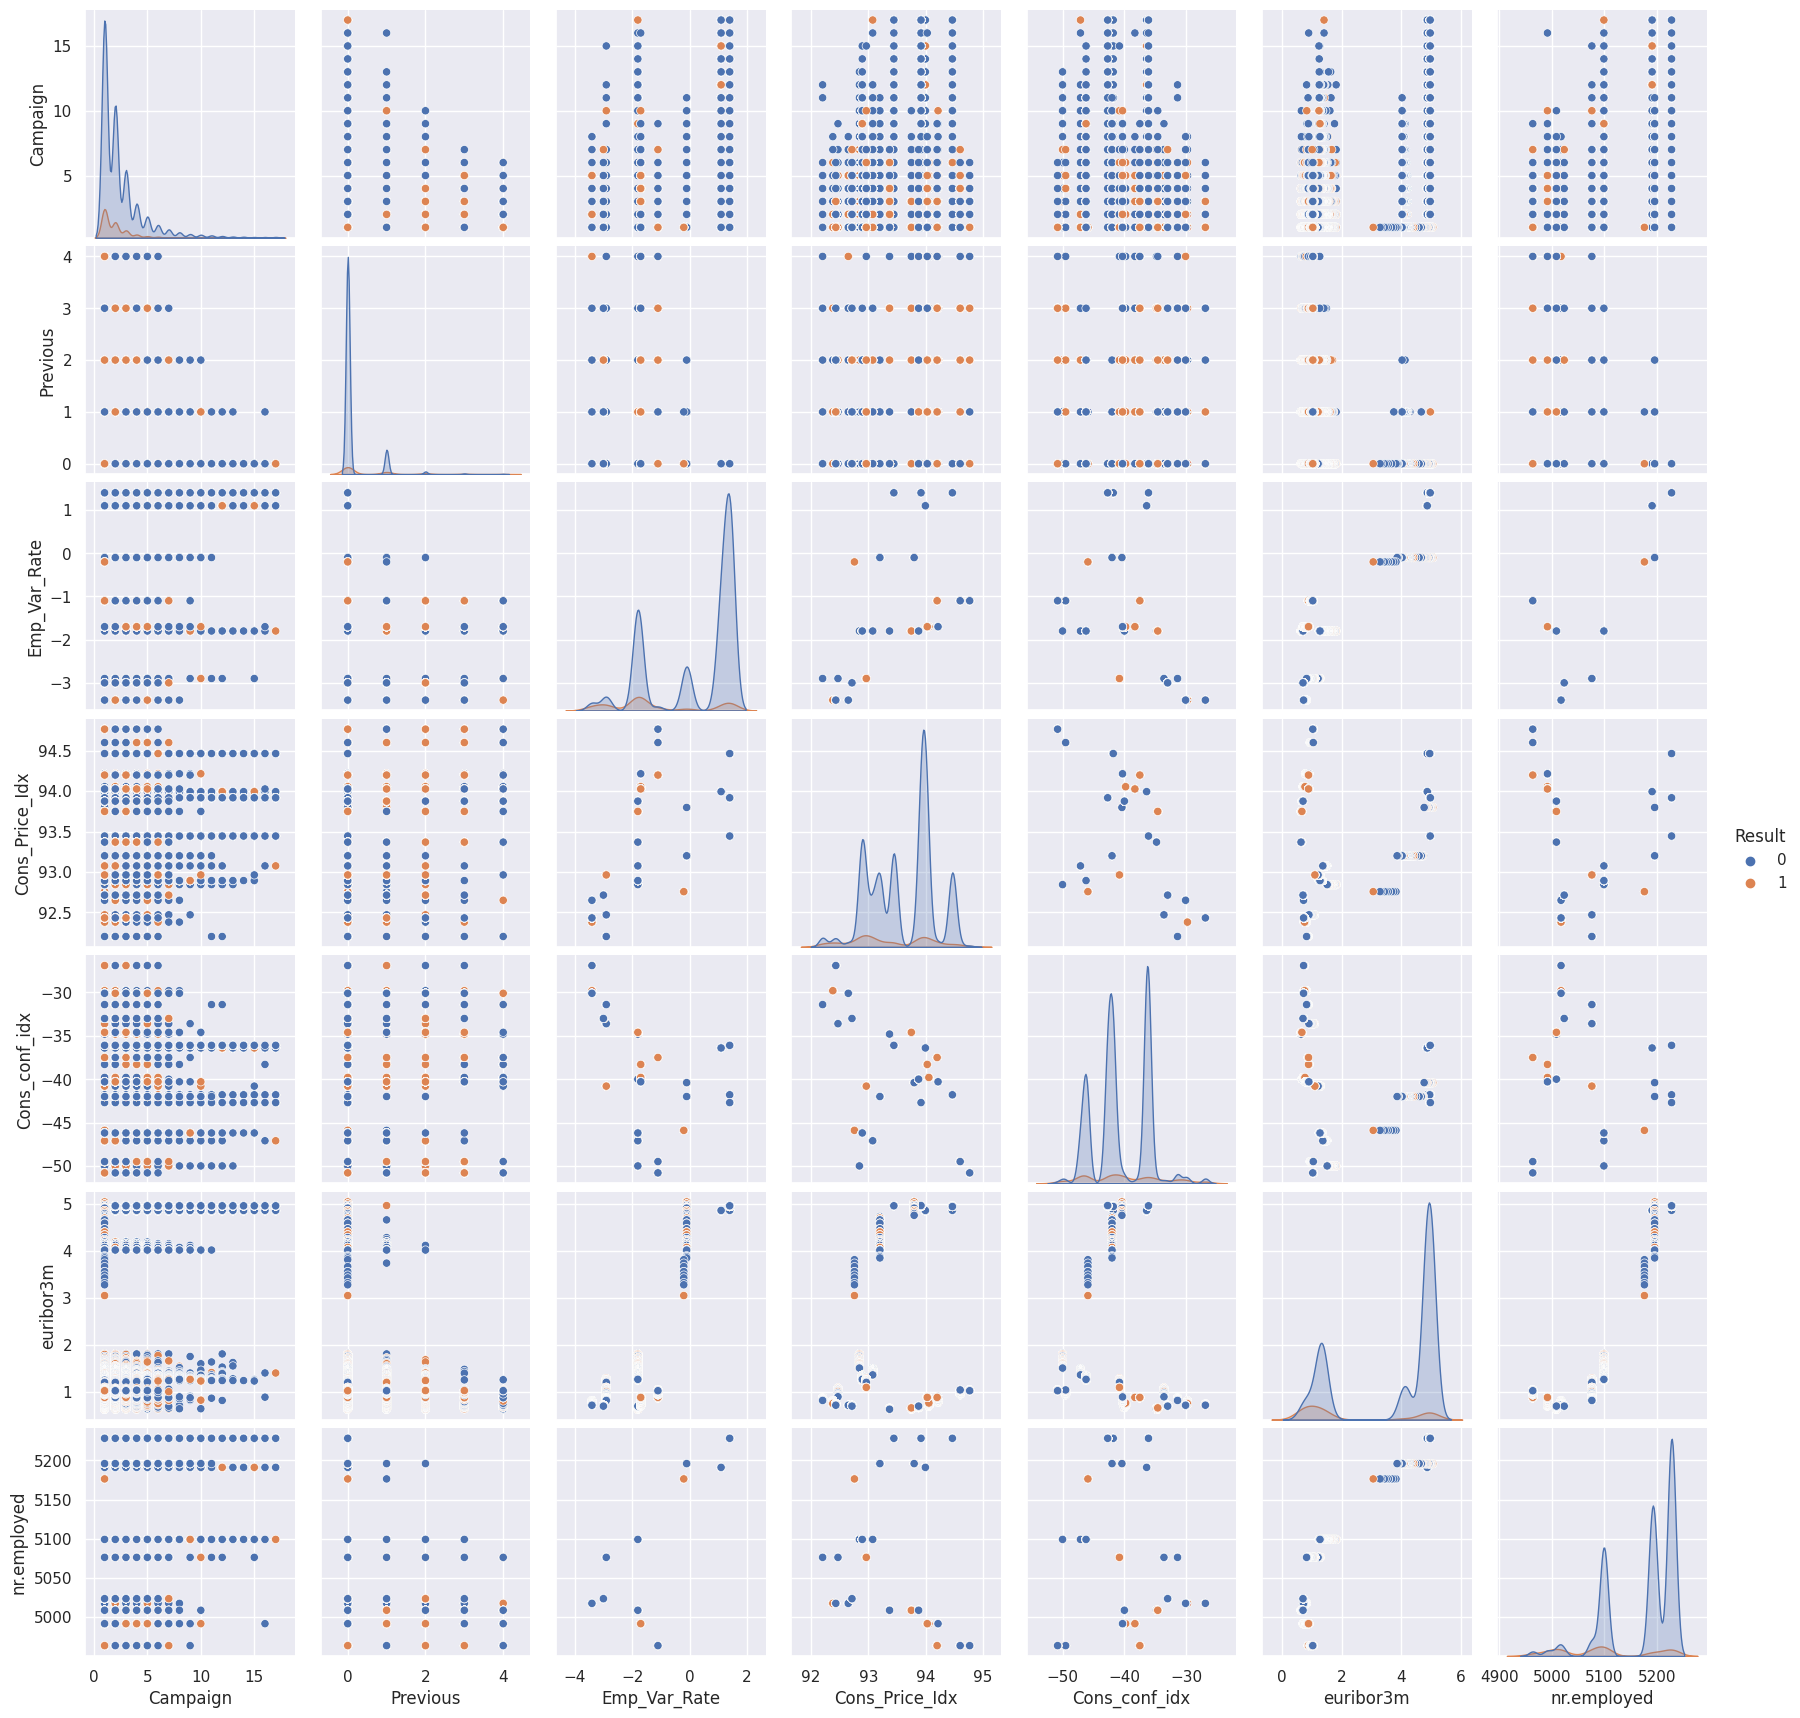

In [86]:
sns.pairplot(df,hue='Result')

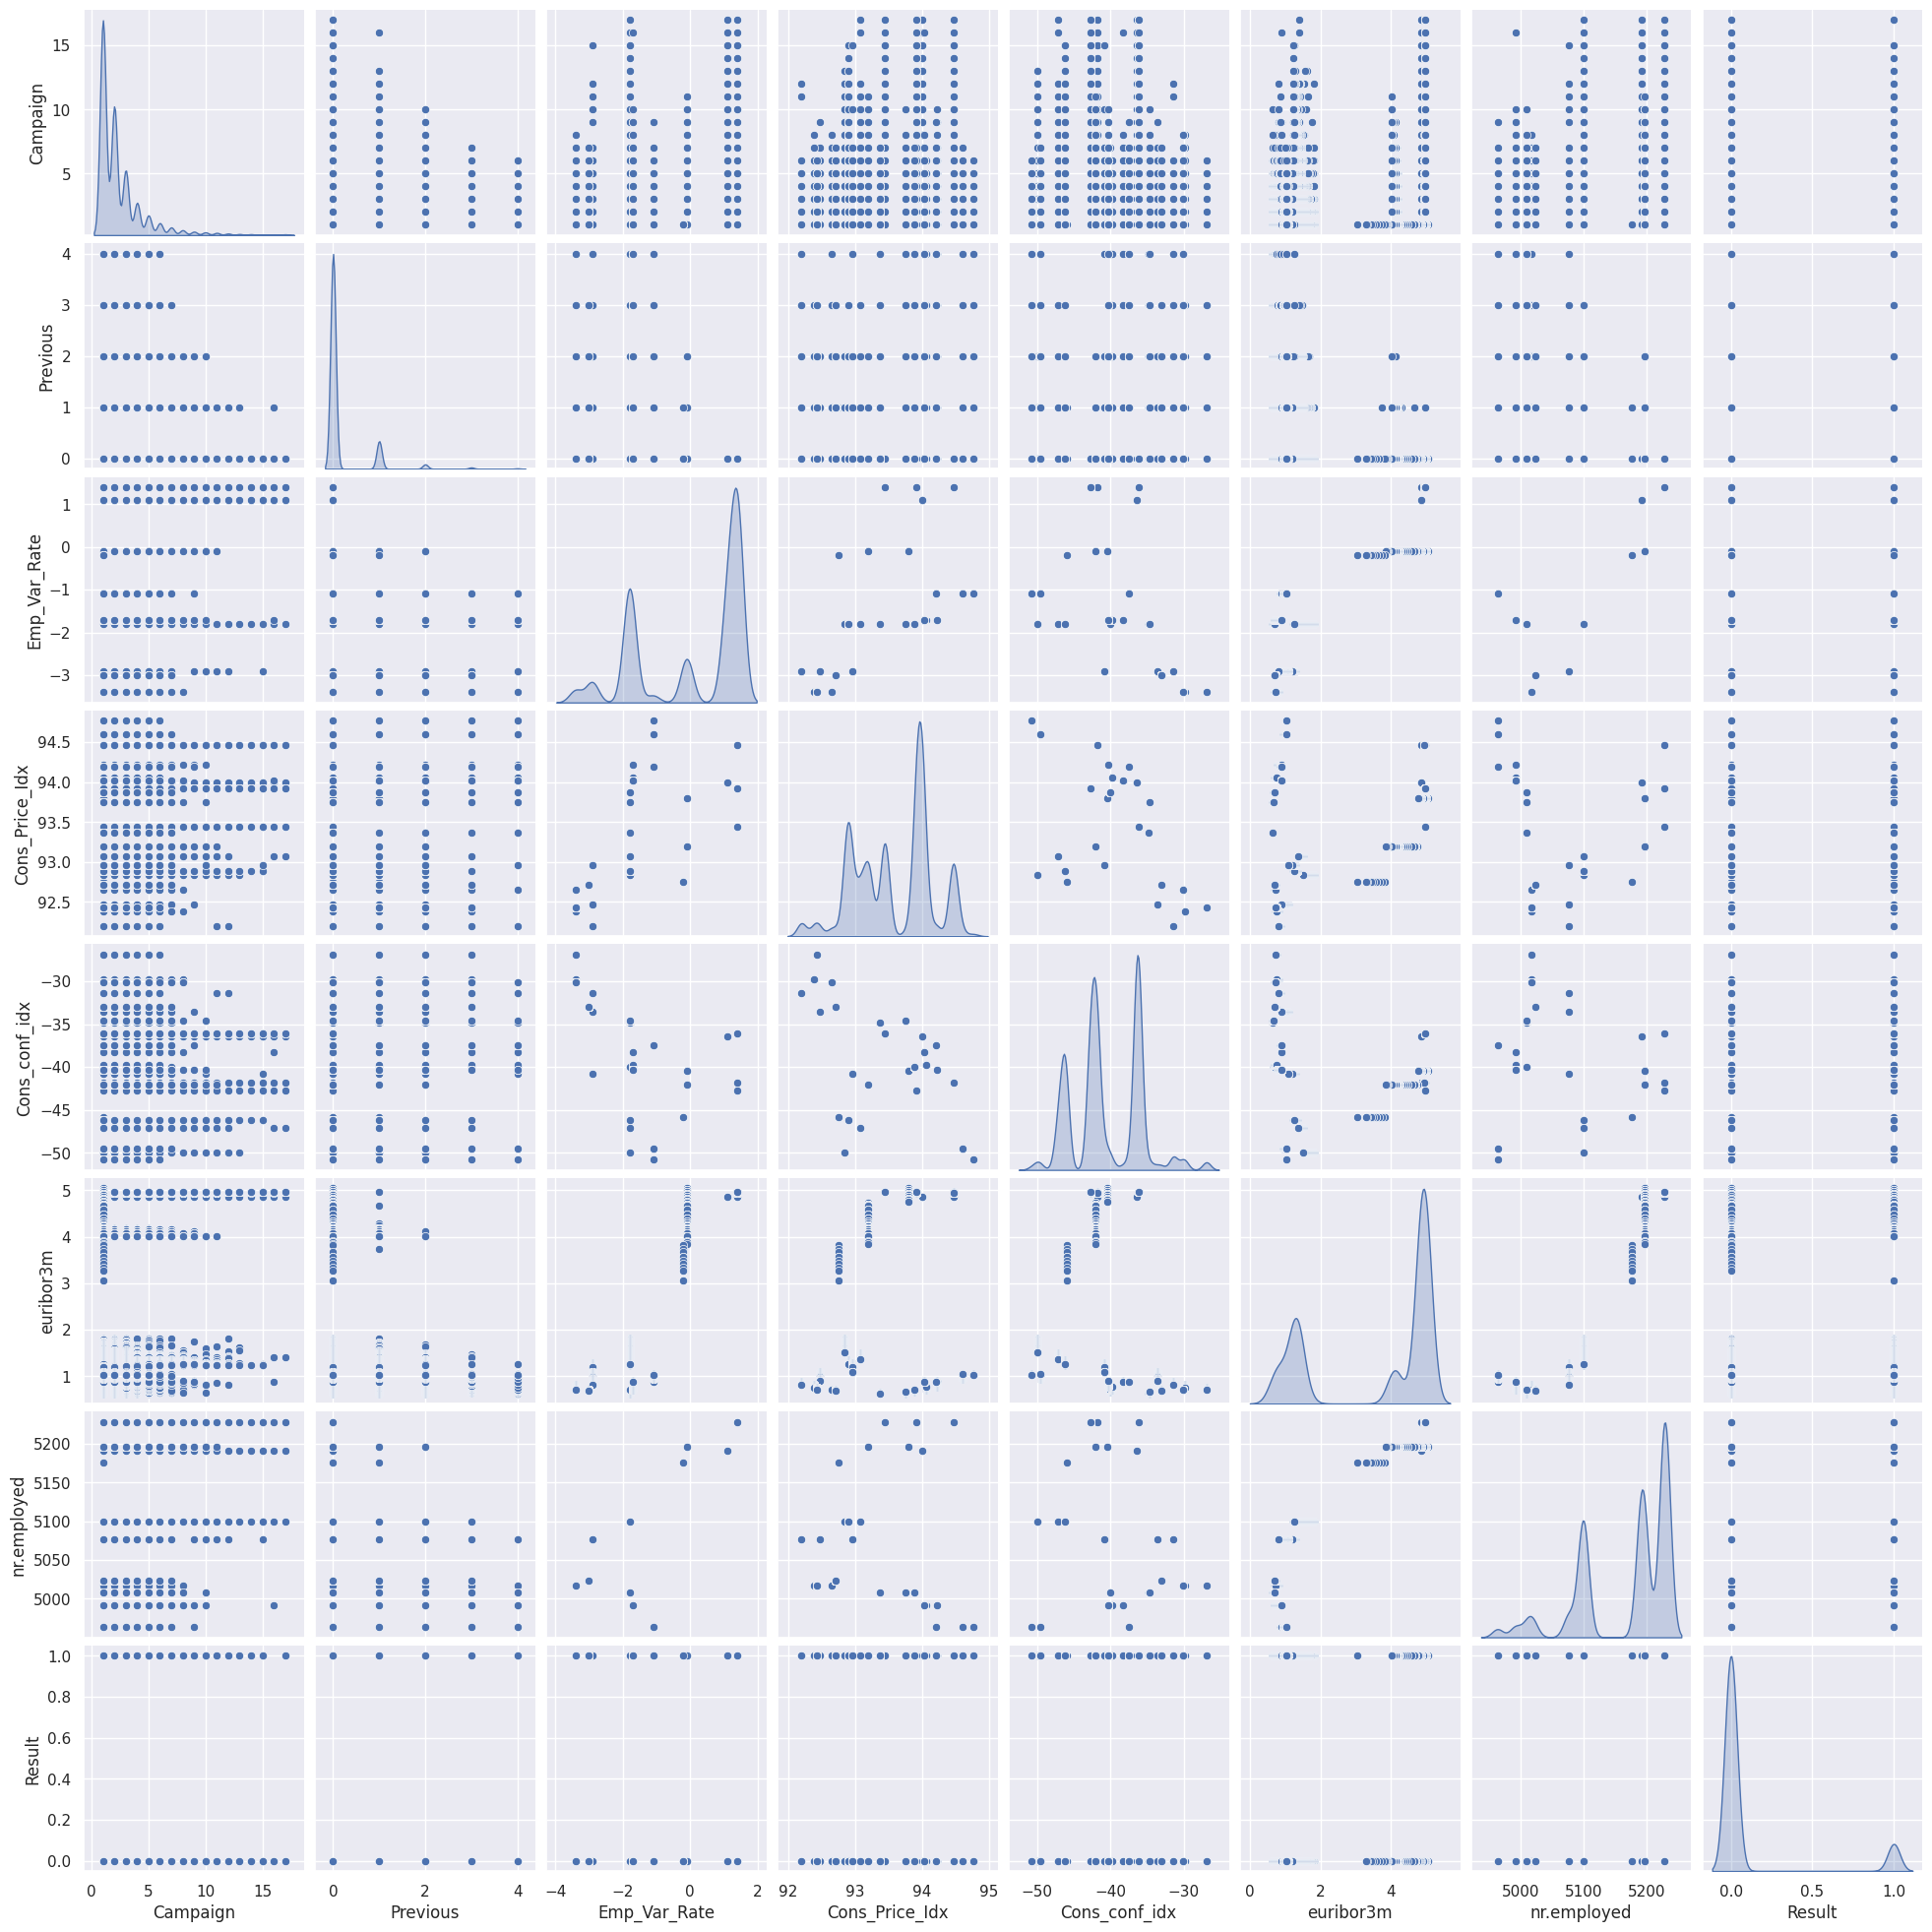

In [87]:
sns.pairplot(df,diag_kind="kde", diag_kws=dict(fill=True))

In [88]:
# Dividing the traget variable and the predictors

In [89]:
X = df.drop('Result',axis=1)

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37974 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age Binned      37974 non-null  object 
 1   Job             37974 non-null  object 
 2   Marital Status  37974 non-null  object 
 3   Education       37974 non-null  object 
 4   Housing Loan    37974 non-null  object 
 5   Personal Loan   37974 non-null  object 
 6   Contact         37974 non-null  object 
 7   Month           37974 non-null  object 
 8   Day_of_week     37974 non-null  object 
 9   Campaign        37974 non-null  int64  
 10  Previous        37974 non-null  int64  
 11  Poutcome        37974 non-null  object 
 12  Emp_Var_Rate    37974 non-null  float64
 13  Cons_Price_Idx  37974 non-null  float64
 14  Cons_conf_idx   37974 non-null  float64
 15  euribor3m       37974 non-null  float64
 16  nr.employed     37974 non-null  float64
dtypes: float64(5), int64(2), object

In [91]:
y = df['Result']

In [92]:
#adding dummy variables for the categorical variables
# df_encoded = pd.get_dummies(X[['Age Binned', 'Job', 'Marital Status', 'Education', 'Housing Loan',
#        'Personal Loan', 'Contact', 'Month', 'Day_of_week','Poutcome']])
# df_encoded

In [93]:
# using label encoder to convert all the categorical variables to continuous variables. Also label encoder helps in reducing the model complexity by not increasing the number of columns.
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Transform the data using the encoder
X['Age Binned'] = le.fit_transform(X['Age Binned'])
X['Job'] = le.fit_transform(X['Job'])
X['Marital Status'] = le.fit_transform(X['Marital Status'])
X['Education'] = le.fit_transform(X['Education'])
X['Housing Loan'] = le.fit_transform(X['Housing Loan'])
X['Personal Loan'] = le.fit_transform(X['Personal Loan'])
X['Contact'] = le.fit_transform(X['Contact'])
X['Month'] = le.fit_transform(X['Month'])
X['Day_of_week'] = le.fit_transform(X['Day_of_week'])
X['Poutcome'] = le.fit_transform(X['Poutcome'])


In [94]:
X

,Age Binned,Job,Marital Status,Education,Housing Loan,Personal Loan,Contact,Month,Day_of_week,Campaign,Previous,Poutcome,Emp_Var_Rate,Cons_Price_Idx,Cons_conf_idx,euribor3m,nr.employed
0,4,3,1,0,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
1,4,7,1,3,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
2,2,7,1,3,1,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
3,2,0,1,1,0,0,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
4,4,7,1,3,0,1,1,6,1,1,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,6,5,1,4,1,0,0,7,0,1,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,3,1,1,4,0,0,0,7,0,1,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,4,5,1,5,1,0,0,7,0,2,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,3,9,1,4,0,0,0,7,0,1,0,1,-1.1,94.767,-50.8,1.028,4963.6


In [95]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37974 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age Binned      37974 non-null  int64  
 1   Job             37974 non-null  int64  
 2   Marital Status  37974 non-null  int64  
 3   Education       37974 non-null  int64  
 4   Housing Loan    37974 non-null  int64  
 5   Personal Loan   37974 non-null  int64  
 6   Contact         37974 non-null  int64  
 7   Month           37974 non-null  int64  
 8   Day_of_week     37974 non-null  int64  
 9   Campaign        37974 non-null  int64  
 10  Previous        37974 non-null  int64  
 11  Poutcome        37974 non-null  int64  
 12  Emp_Var_Rate    37974 non-null  float64
 13  Cons_Price_Idx  37974 non-null  float64
 14  Cons_conf_idx   37974 non-null  float64
 15  euribor3m       37974 non-null  float64
 16  nr.employed     37974 non-null  float64
dtypes: float64(5), int64(12)
memory

In [96]:
#dropping the original variables from the X
# X.drop(['Age Binned', 'Job', 'Marital Status', 'Education', 'Housing Loan',
#        'Personal Loan', 'Contact', 'Month', 'Day_of_week','Poutcome'],axis=1,inplace=True)

In [97]:
#concating the enconded variables to X
# X = pd.concat([X,df_encoded],axis=1)
# X

# As our class of interest in the target variable is only 11%, Tried to split the data using 3 ways to see the best perfoming model.

1. Split with Random sampling.

2. Split with Undersampling.

3. Split with Oversampling.


# Splitting the data with Random Sampling

In [98]:
# Splitting the data into train and test with 80-20 ratio.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, X_test.shape)

(30379, 17) (7595, 17)


# Splitting data with Undersampling

In [99]:
from imblearn.under_sampling import NearMiss
undersampler = NearMiss(version = 1, n_neighbors = 3)
X_resampled_train, y_resampled_train = undersampler.fit_resample(X_train, y_train)
print(X_resampled_train.shape, y_resampled_train.shape)
print('*****y_resampled_train*****')
print(y_resampled_train.value_counts())
print('*****y_train*****')
print(y_train.value_counts())

(6772, 17) (6772,)
*****y_resampled_train*****
0    3386
1    3386
Name: Result, dtype: int64
*****y_train*****
0    26993
1     3386
Name: Result, dtype: int64


# Splitting data with Oversampling (SMOTE)

In [100]:
from imblearn.over_sampling import SMOTE
X_resampled_train_smote, y_resampled_train_smote = SMOTE().fit_resample(X_train, y_train)

# Applying the standard scaler

In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [102]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_resampled_train)
X_resampled_train_std = sc.transform(X_resampled_train)
# X_resampled_test_std = sc.transform(X_resampled_test)

In [103]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_resampled_train_smote)
X_resampled_train_smote_std = sc.transform(X_resampled_train_smote)
# X_resampled_test_std = sc.transform(X_resampled_test)

# Modelling

# Logistic Regression with random sampling

In [106]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
model=lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.90


In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6645   96]
 [ 680  174]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      6741
           1       0.64      0.20      0.31       854

    accuracy                           0.90      7595
   macro avg       0.78      0.59      0.63      7595
weighted avg       0.88      0.90      0.87      7595



0.8978275181040158

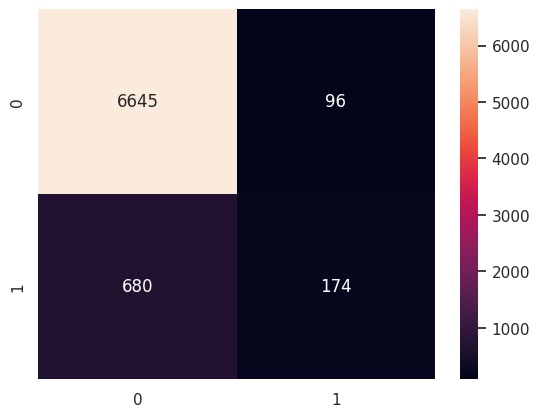

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy_score(y_test, y_pred)

AUC: 0.7720037506857091


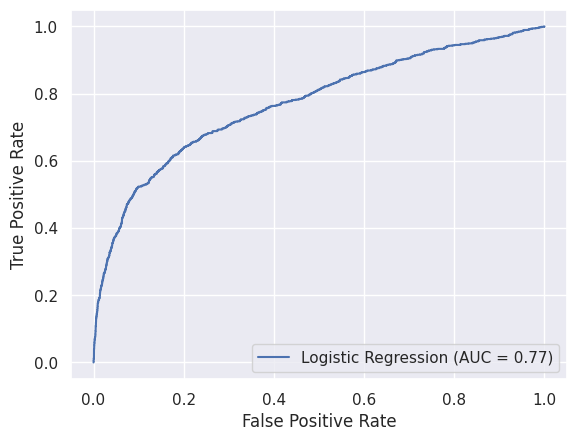

In [109]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = lr.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)


# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

In [173]:
# Fine tuning the model with StartifiedKFold

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
y1 = y.copy()
X1 = X.copy()

skf = StratifiedKFold(n_splits=10)

for fold, (tr, te) in enumerate(skf.split(X1, y1)):
  X_train1, X_test1 = X1.iloc[tr], X1.iloc[te]
  y_train1, y_test1 = y1.iloc[tr], y1.iloc[te]

  lr =LogisticRegression()
  lr.fit(X_train1, y_train1)
  y_pred = lr.predict(X_test1)

  # results
  print("Fold " ,fold+1)
  print('Accuracy: %.2f' % accuracy_score(y_test1, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  1
Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  2
Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  3
Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  4
Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  5
Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  6
Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  7
Accuracy: 0.89


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  8
Accuracy: 0.62


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold  9
Accuracy: 0.92
Fold  10
Accuracy: 0.36


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Tried to build a logistic regression model using the statsmodels to get the model summary and find the significant variables

In [111]:
import statsmodels.api as sm
X_sm = sm.add_constant(X)
sm_model = sm.Logit(y, X_sm).fit()

Optimization terminated successfully.
         Current function value: 0.281777
         Iterations 8


In [112]:
print(sm_model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                37974
Model:                          Logit   Df Residuals:                    37956
Method:                           MLE   Df Model:                           17
Date:                Mon, 19 Jun 2023   Pseudo R-squ.:                  0.1948
Time:                        16:12:48   Log-Likelihood:                -10700.
converged:                       True   LL-Null:                       -13289.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -35.6498     17.289     -2.062      0.039     -69.536      -1.764
Age Binned         0.0265      0.017      1.531      0.126      -0.007       0.060
Job                0.0056      0.005

In [113]:
results = pd.DataFrame({'coefficients': sm_model.params,
                        'p-values': round(sm_model.pvalues,3)})
results.sort_values(by='p-values', ascending=True)

,coefficients,p-values
Month,-0.087218,0.000
Cons_Price_Idx,0.863119,0.000
Emp_Var_Rate,-0.851854,0.000
Poutcome,0.867482,0.000
Previous,0.233723,0.000
Day_of_week,0.059018,0.000
euribor3m,0.527634,0.000
nr.employed,-0.009503,0.000
Education,0.046521,0.000
Contact,-0.793252,0.000


# Fine Tuning

In [114]:
#@title
# X.drop(['Personal Loan','Housing Loan','Job','Age Binned'],axis=1,inplace=True)

In [115]:
#@title
# X.drop('Marital Status',axis=1,inplace=True)

In [116]:
#@title
# X.drop('Campaign',axis=1,inplace=True)

In [117]:
#@title
# Splitting the data into train and test
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
# print(X_train.shape, X_test.shape)

In [118]:
#@title
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

In [119]:
#@title
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(C=1000.0, random_state=0)
# model=lr.fit(X_train_std, y_train)

# y_pred = lr.predict(X_test_std)
# from sklearn.metrics import accuracy_score
# print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [120]:
#@title
# from sklearn.metrics import classification_report, confusion_matrix
# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))

In [121]:
#@title
# from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt


# # predict probabilities on test set
# y_pred_proba = lr.predict_proba(X_test_std)[:,1]

# # calculate AUC
# auc = roc_auc_score(y_test, y_pred_proba)
# print('AUC:', auc)


# # plot ROC curve using RocCurveDisplay
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
# roc_display.plot()
# plt.show()

## Following the statsmodel and fine tuning the model did not result in any improved performance

# Logistic Regression with stratified sampling

In [122]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
model=lr.fit(X_resampled_train_std, y_resampled_train)

y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.58


In [123]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3733 3008]
 [ 215  639]]
              precision    recall  f1-score   support

           0       0.95      0.55      0.70      6741
           1       0.18      0.75      0.28       854

    accuracy                           0.58      7595
   macro avg       0.56      0.65      0.49      7595
weighted avg       0.86      0.58      0.65      7595



AUC: 0.7205761728622812


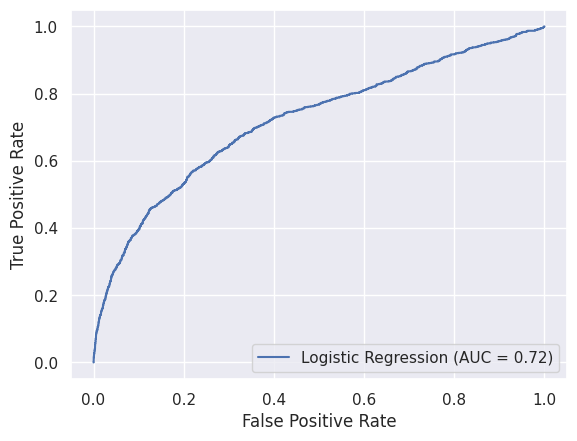

In [124]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = model.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

# Logistic Regression With SMOTE sampling

In [125]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_resampled_train_smote_std, y_resampled_train_smote)

y_pred = lr.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.60


In [126]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[3894 2847]
 [ 207  647]]
              precision    recall  f1-score   support

           0       0.95      0.58      0.72      6741
           1       0.19      0.76      0.30       854

    accuracy                           0.60      7595
   macro avg       0.57      0.67      0.51      7595
weighted avg       0.86      0.60      0.67      7595



AUC: 0.7481973536056576


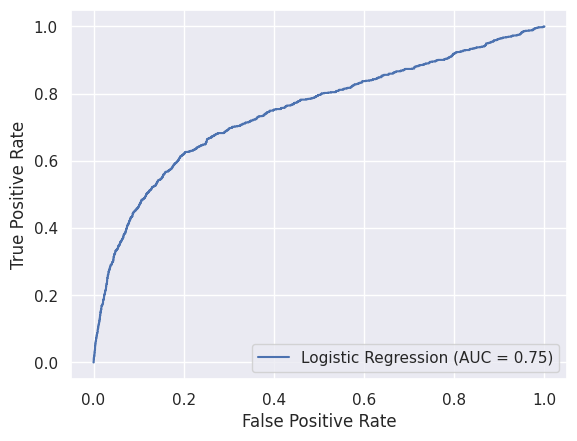

In [127]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# predict probabilities on test set
y_pred_proba = lr.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

# Decision Tree with Random Sampling

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(random_state=0)

In [129]:
y_pred = dt.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.85


In [130]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6145  596]
 [ 581  273]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6741
           1       0.31      0.32      0.32       854

    accuracy                           0.85      7595
   macro avg       0.61      0.62      0.61      7595
weighted avg       0.85      0.85      0.85      7595



0.845029624753127

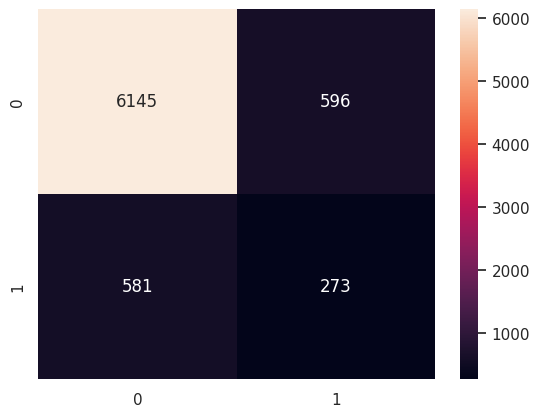

In [131]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy_score(y_test, y_pred)

AUC: 0.6214375694611637


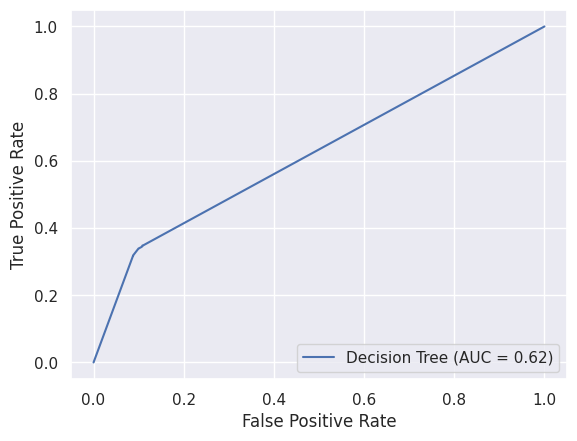

In [132]:
y_pred_proba = dt.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Decision Tree')
roc_display.plot()
plt.show()

# Decision Tree with Statified Sampling

In [133]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_resampled_train_std, y_resampled_train)

DecisionTreeClassifier(random_state=0)

In [134]:
y_pred = dt.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.37


In [135]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2087 4654]
 [ 129  725]]
              precision    recall  f1-score   support

           0       0.94      0.31      0.47      6741
           1       0.13      0.85      0.23       854

    accuracy                           0.37      7595
   macro avg       0.54      0.58      0.35      7595
weighted avg       0.85      0.37      0.44      7595



AUC: 0.5794559282269672


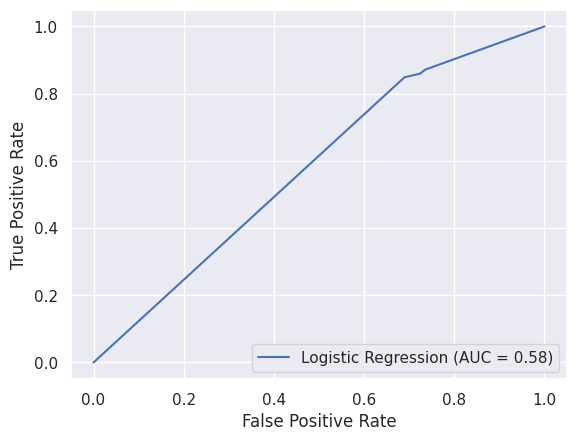

In [136]:
y_pred_proba = dt.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

# Decision Tree With SMOTE sampling

In [137]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_resampled_train_smote_std, y_resampled_train_smote)

DecisionTreeClassifier(random_state=0)

In [138]:
y_pred = dt.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.72


In [139]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5157 1584]
 [ 514  340]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      6741
           1       0.18      0.40      0.24       854

    accuracy                           0.72      7595
   macro avg       0.54      0.58      0.54      7595
weighted avg       0.83      0.72      0.77      7595



AUC: 0.5825335854172118


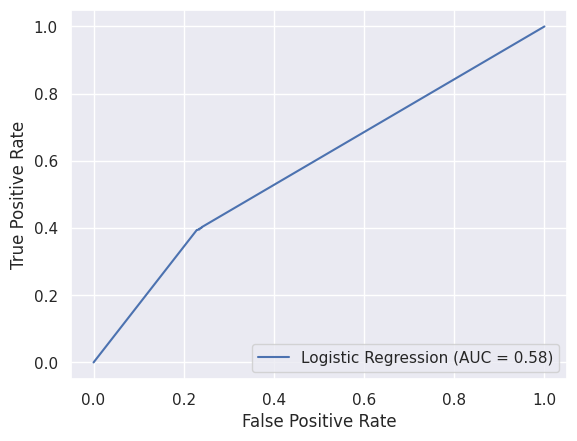

In [140]:
y_pred_proba = dt.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Logistic Regression')
roc_display.plot()
plt.show()

# Random Forest Model with random sampling

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train_std, y_train)

RandomForestClassifier(random_state=0)

In [142]:
y_pred = rfc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.89


In [143]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6517  224]
 [ 602  252]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6741
           1       0.53      0.30      0.38       854

    accuracy                           0.89      7595
   macro avg       0.72      0.63      0.66      7595
weighted avg       0.87      0.89      0.88      7595



0.8912442396313364

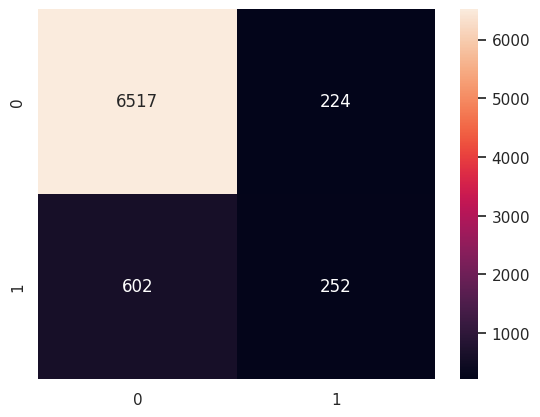

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy_score(y_test, y_pred)

AUC: 0.7701193750571063


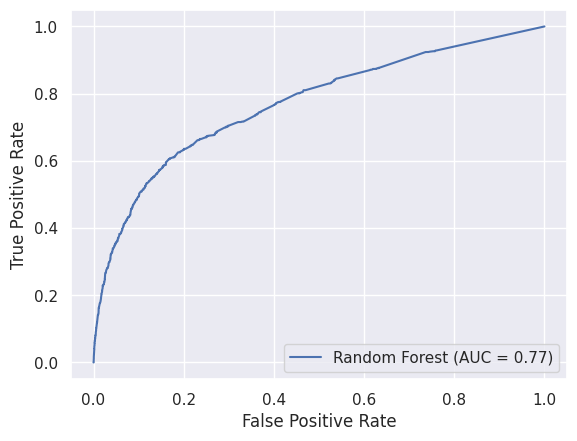

In [145]:
y_pred_proba = rfc.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Random Forest')
roc_display.plot()
plt.show()

In [146]:
importances = rfc.feature_importances_

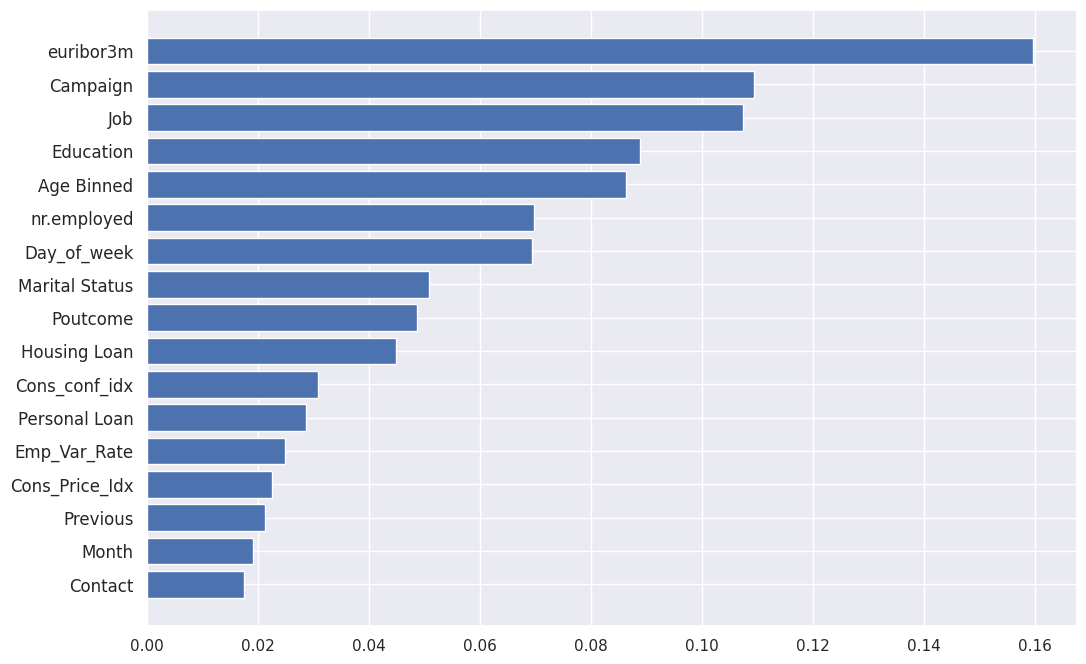

In [147]:
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize = (12, 8))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices], size = 12)

# Random Forest Model with stratified sampling

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_resampled_train_std, y_resampled_train)

RandomForestClassifier(random_state=0)

In [149]:
y_pred = rfc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.34


In [150]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1831 4910]
 [  99  755]]
              precision    recall  f1-score   support

           0       0.95      0.27      0.42      6741
           1       0.13      0.88      0.23       854

    accuracy                           0.34      7595
   macro avg       0.54      0.58      0.33      7595
weighted avg       0.86      0.34      0.40      7595



AUC: 0.7065533123008664


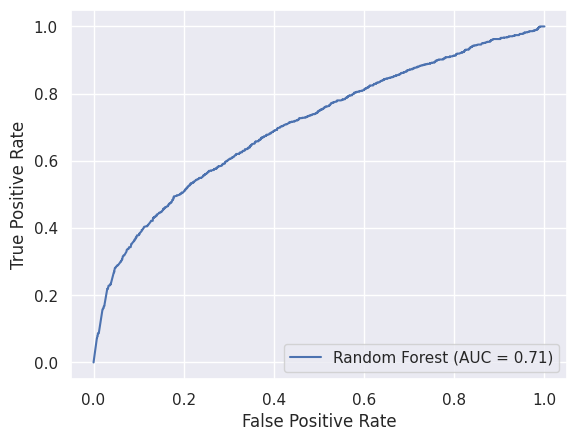

In [151]:
y_pred_proba = rfc.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Random Forest')
roc_display.plot()
plt.show()

# Random Forest Model with SMOTE sampling

In [152]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
rfc.fit(X_resampled_train_smote_std, y_resampled_train_smote)

RandomForestClassifier(random_state=0)

In [153]:
y_pred = rfc.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.79


In [154]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[5552 1189]
 [ 374  480]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88      6741
           1       0.29      0.56      0.38       854

    accuracy                           0.79      7595
   macro avg       0.61      0.69      0.63      7595
weighted avg       0.86      0.79      0.82      7595



AUC: 0.7422145304677205


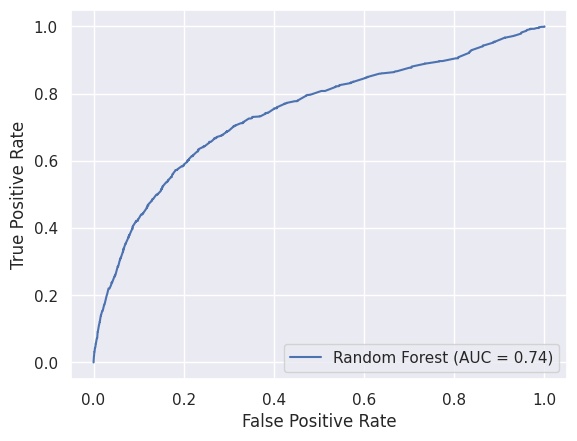

In [155]:
y_pred_proba = rfc.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Random Forest')
roc_display.plot()
plt.show()

# Gradient Boosting with random sampling

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train_std, y_train)

GradientBoostingClassifier(random_state=0)

In [157]:
y_test.value_counts()

0    6741
1     854
Name: Result, dtype: int64

In [158]:
y_pred = gb.predict(X_test_std)
#y_pred = y_pred.astype('int64')
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.90


In [159]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6625  116]
 [ 651  203]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      6741
           1       0.64      0.24      0.35       854

    accuracy                           0.90      7595
   macro avg       0.77      0.61      0.65      7595
weighted avg       0.88      0.90      0.88      7595



0.8990125082290981

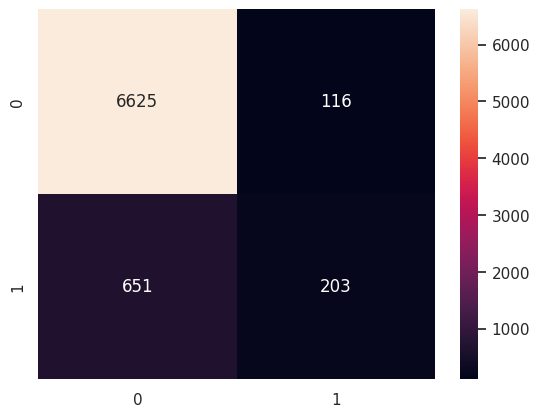

In [160]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True)
accuracy_score(y_test, y_pred)

In [161]:
y_test.value_counts()

0    6741
1     854
Name: Result, dtype: int64

AUC: 0.7877602090322877


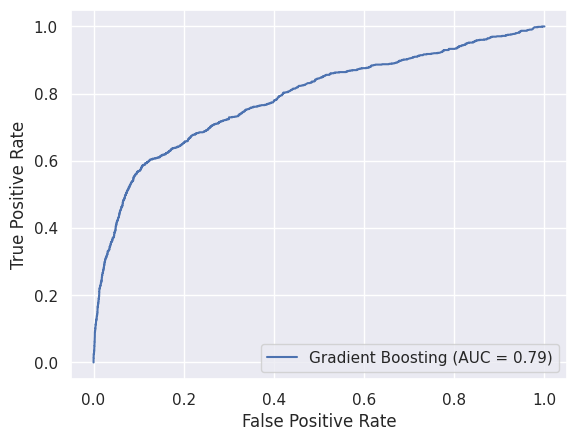

In [162]:
y_pred_proba = gb.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Gradient Boosting')
roc_display.plot()
plt.show()

In [174]:
# Performed cross validation to the model to check the consistency of the model
from sklearn.pipeline import Pipeline

pipe_gb = Pipeline([('clf', GradientBoostingClassifier())])

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator = pipe_gb, X = X_train_std, y = y_train, cv = 10, n_jobs = 1)

print('CV accuracy scores: %s' % scores)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [0.90256748 0.89927584 0.90388413 0.90322581 0.89697169 0.90289664
 0.90256748 0.89795918 0.90520079 0.90451103]
CV accuracy: 0.902 +/- 0.003


# Gradient Boosting with stratified under sampling

In [164]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_resampled_train_std, y_resampled_train)

GradientBoostingClassifier(random_state=0)

In [165]:
y_pred = gb.predict(X_test_std)
#y_pred = y_pred.astype('int64')
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.45


In [166]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[2743 3998]
 [ 159  695]]
              precision    recall  f1-score   support

           0       0.95      0.41      0.57      6741
           1       0.15      0.81      0.25       854

    accuracy                           0.45      7595
   macro avg       0.55      0.61      0.41      7595
weighted avg       0.86      0.45      0.53      7595



AUC: 0.7081289233940857


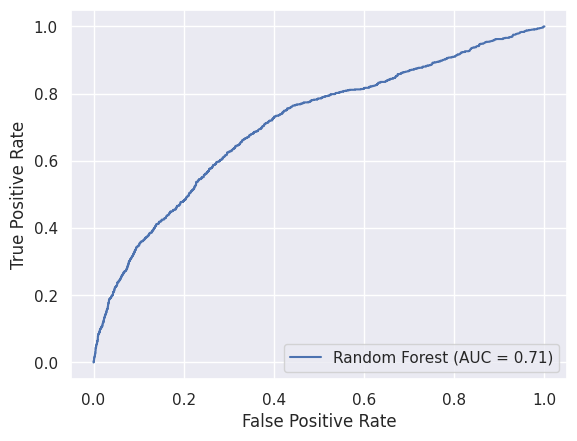

In [167]:
y_pred_proba = gb.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Random Forest')
roc_display.plot()
plt.show()

# Gradient Boosting with smote sampling

In [168]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_resampled_train_smote_std, y_resampled_train_smote)

GradientBoostingClassifier(random_state=0)

In [169]:
y_pred = gb.predict(X_test_std)
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.70


In [170]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[4714 2027]
 [ 250  604]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.81      6741
           1       0.23      0.71      0.35       854

    accuracy                           0.70      7595
   macro avg       0.59      0.70      0.58      7595
weighted avg       0.87      0.70      0.75      7595



AUC: 0.7453993649959857


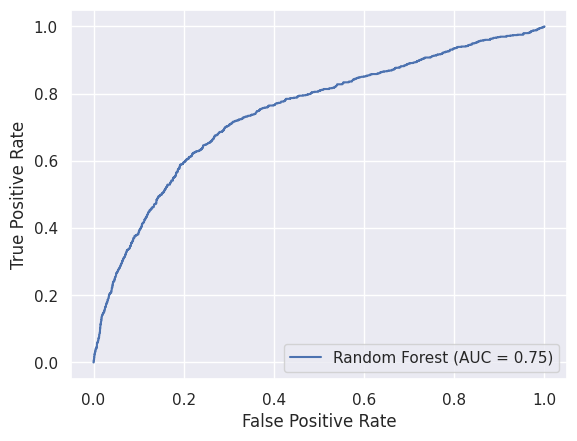

In [171]:
y_pred_proba = gb.predict_proba(X_test_std)[:,1]

# calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC:', auc)

# plot ROC curve using RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='Random Forest')
roc_display.plot()
plt.show()

Clearly, Models that are built with over and under sampling doesn't result in any improved performance when compared to models that are built with random sampling.

# Model Comparison

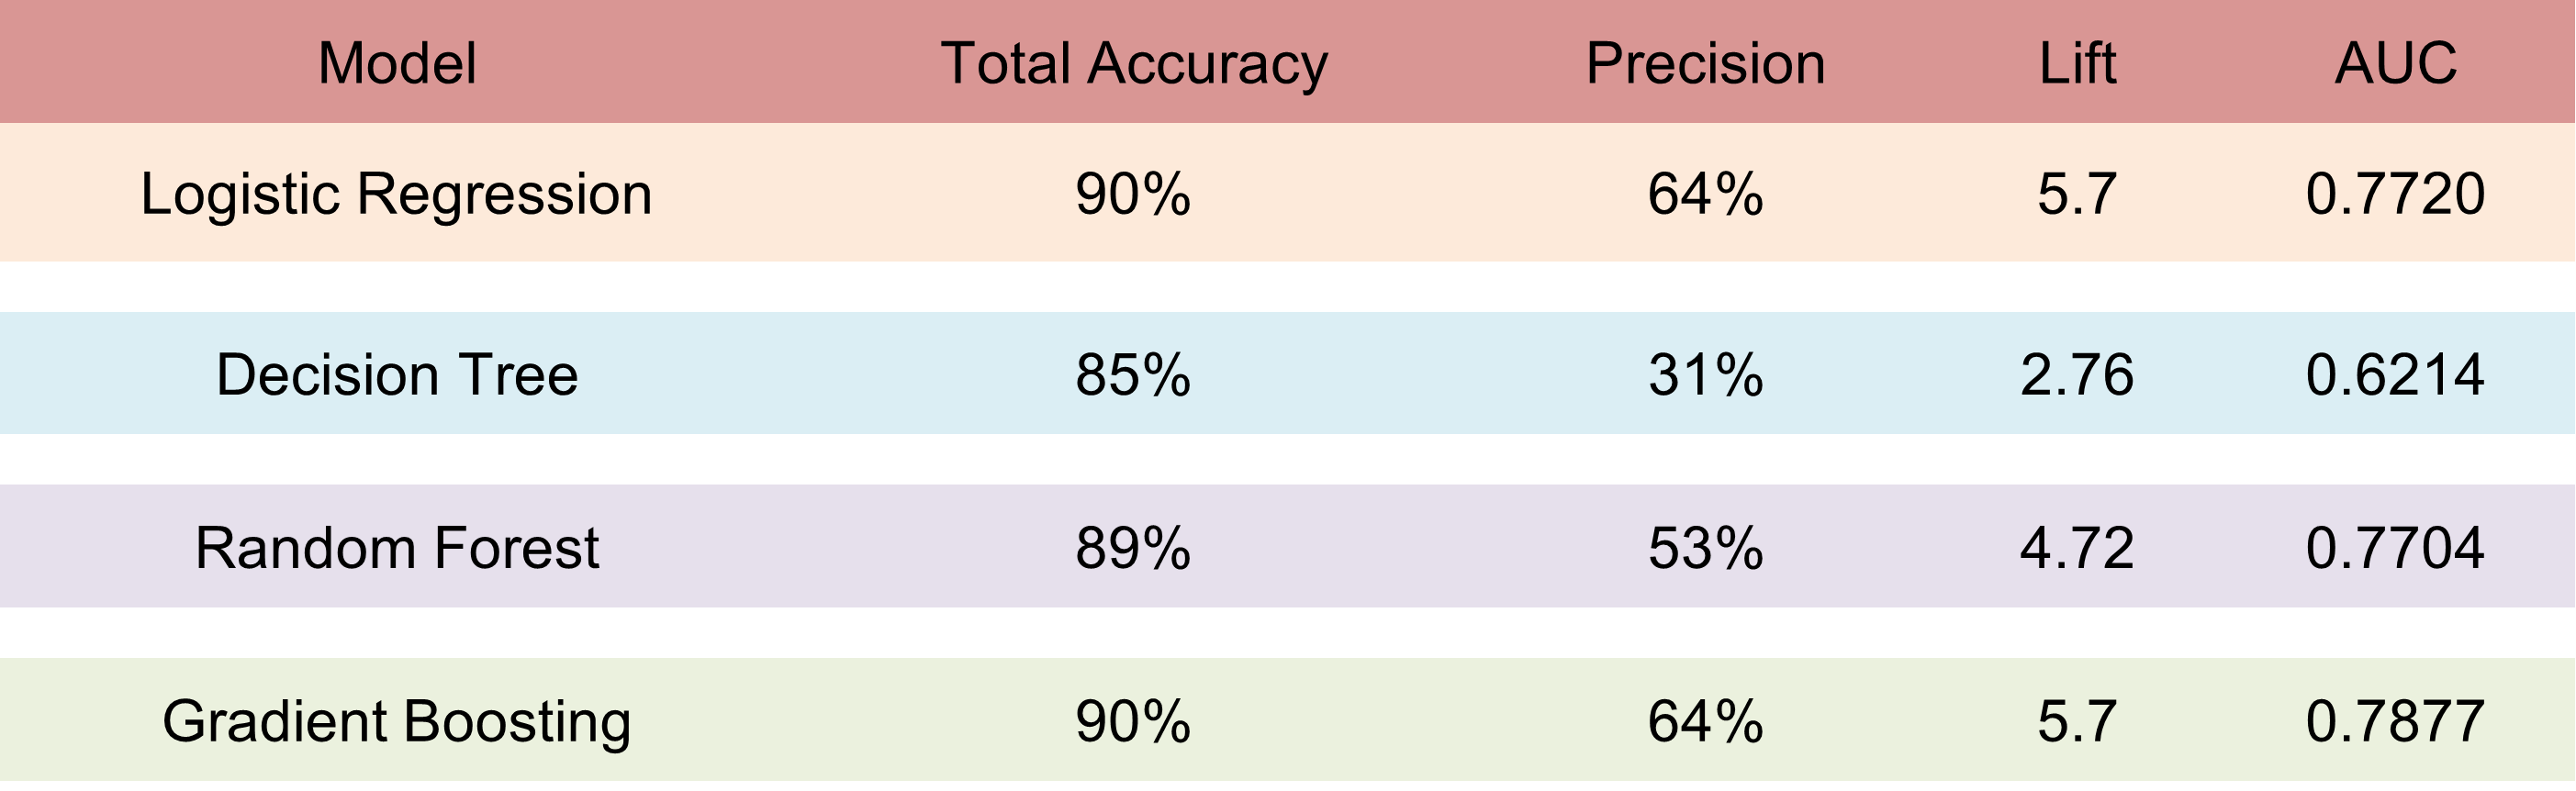

## Gradient Boosting Model is the best performing model

**Business Recommendations:**



1.   We can see that the customers who has enrolled to term deposit in the previous campaign are more likely to be enrolled for the term deposit again. So, the banks can prioritize those customers.
2.   As the probability for customers to enroll for the term deposit is high when the customers were contacted in months March, September, October, and December, banks can plan to arrange more calls to customers during these months.
3.   The banks to contact the customer on cellular instead of telephone to contact the right person to whom the call was intended and convince them to enroll.

